- Data processing are  presented on Jupyter to better intercat with. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, auc, accuracy_score, confusion_matrix, mean_squared_error

In [2]:
!python --version

Python 3.7.1


In [3]:
sns.set(font_scale=1.5)
pd.options.display.max_rows =10
pd.options.display.max_columns = 500
pd.set_option.display_width=1000

df=pd.read_excel('data/GD6.xlsx', index_col=None, header=0)

In [4]:
df.keys()

Index(['CPR_NO', 'NAME', 'ENAME', 'SCH_NM', 'PROV_NM', 'SUBM',
       'Teacher_Gender', 'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1',
       'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK',
       'NAT_MARK', 'GPA'],
      dtype='object')

In [5]:
colmn_names=['SCH_NM', 'PROV_NM', 'SUBM',
       'Teacher_Gender', 'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1',
       'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK',
       'NAT_MARK', 'GPA']

In [6]:
df.index=df.CPR_NO

In [7]:
df.tail()

,CPR_NO,NAME,ENAME,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
CPR_NO,,,,,,,,,,,,,,,,,,
70304602,70304602,هزاع أحمد يوسف الكعبي,HAZZA AHMED YUSUF ALKAABI,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364
71007423,71007423,يوسف سعيد عمير السليمان,YOUSIF SAEED OMAIR ALSULAIMAN,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818
70402183,70402183,يوسف عبدالمنعم علي حسين,YOUSIF ABDULMUNEM ALI HUSAIN,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273
70803196,70803196,يوسف محمد عبدالله المناعي,YOUSIF MOHAMED ABDULLA ALMANNAEI,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818
70211361,70211361,يوسف مصطفى محمد عبدالله,YOUSIF MUSTAFA MOHAMMED ABDULLA,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,29.0,27.0,14.0,16.0,16.0,19.5,59.0,63,61,39.0,81.818182


In [8]:
df[df.GPA>85].count()/df.shape[0]

CPR_NO      0.788094
NAME        0.788094
ENAME       0.788094
SCH_NM      0.788094
PROV_NM     0.788094
              ...   
TOTAL1      0.787846
TOTAL2      0.788094
D_MARK      0.788094
NAT_MARK    0.788094
GPA         0.788094
Length: 18, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24190 entries, 70913390 to 70211361
Data columns (total 18 columns):
CPR_NO            24190 non-null int64
NAME              24190 non-null object
ENAME             24190 non-null object
SCH_NM            24190 non-null object
PROV_NM           24190 non-null object
SUBM              24190 non-null object
Teacher_Gender    24190 non-null object
ACHIEVEMENTS1     24172 non-null float64
ACHIEVEMENTS2     24190 non-null float64
MIDTERM1          24172 non-null float64
MIDTERM2          24190 non-null float64
FINAL1            24174 non-null float64
FINAL2            24190 non-null float64
TOTAL1            24174 non-null float64
TOTAL2            24190 non-null int64
D_MARK            24190 non-null int64
NAT_MARK          24190 non-null float64
GPA               24190 non-null float64
dtypes: float64(9), int64(3), object(6)
memory usage: 3.5+ MB


In [10]:
df.keys()

Index(['CPR_NO', 'NAME', 'ENAME', 'SCH_NM', 'PROV_NM', 'SUBM',
       'Teacher_Gender', 'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1',
       'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK',
       'NAT_MARK', 'GPA'],
      dtype='object')

In [11]:
df.shape

(24190, 18)

In [12]:
df=df.drop(['CPR_NO', 'NAME', 'ENAME'], axis=1)

In [13]:
df.head()


,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
CPR_NO,,,,,,,,,,,,,,,
70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [14]:
df.dtypes

SCH_NM             object
PROV_NM            object
SUBM               object
Teacher_Gender     object
ACHIEVEMENTS1     float64
                   ...   
TOTAL1            float64
TOTAL2              int64
D_MARK              int64
NAT_MARK          float64
GPA               float64
Length: 15, dtype: object

In [15]:
subj=["العلوم","الرياضيات"]
df[df.SUBM.isin(subj)].head()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
CPR_NO,,,,,,,,,,,,,,,
70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [16]:
df.SUBM.unique()

array(['العلوم', 'الرياضيات'], dtype=object)

In [17]:
df.Teacher_Gender.unique()

array(['مدرسين', 'مدرسات'], dtype=object)

In [18]:
df.PROV_NM.unique()

array(['محافظة العاصمة', 'المحافظة الشمالية', 'المحافظة الجنوبية',
       'محافظة المحرق'], dtype=object)

In [19]:
df.PROV_NM = df["PROV_NM"].map({'المحافظة الجنوبية':'South', 'المحافظة الشمالية':'North',\
                                'محافظة العاصمة': 'Cap',  \
                                'محافظة المحرق':'West'})

In [20]:
df.SUBM = df["SUBM"].map({'العلوم':'Science','الرياضيات':'Math'})

In [21]:
df.Teacher_Gender = df["Teacher_Gender"].map({'مدرسات':'F', 'مدرسين':'M'})

In [22]:
df.tail()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
CPR_NO,,,,,,,,,,,,,,,
70304602,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364
71007423,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818
70402183,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273
70803196,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818
70211361,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,29.0,27.0,14.0,16.0,16.0,19.5,59.0,63,61,39.0,81.818182


In [23]:
df.shape

(24190, 15)

In [24]:
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [25]:
data_column_category

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender'], dtype='object')

In [26]:
df.to_csv("GD6_clean.csv")

In [223]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data_column_category:

    df[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

df.head()

In [224]:
df.iloc[:,1:].describe()

,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
count,24172.000000,24190.000000,24172.000000,24190.000000,24174.00000,24190.000000,24174.000000,24190.000000,24190.000000,24190.000000,24190.000000
mean,28.013205,28.226147,16.396359,16.233038,37.58565,35.387970,82.145321,80.090492,81.366226,51.163878,89.781241
std,2.516684,2.404484,3.691991,3.738233,10.61787,8.338934,15.120198,12.775070,13.360015,10.752687,6.986924
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,27.000000,14.500000,14.000000,31.00000,30.500000,73.000000,72.000000,73.000000,44.200000,86.090909
50%,29.000000,29.000000,17.500000,17.000000,40.00000,37.000000,86.000000,83.000000,84.000000,51.300000,91.090909
75%,30.000000,30.000000,19.000000,19.000000,46.00000,42.000000,94.000000,90.000000,92.000000,58.300000,95.000000
max,30.000000,30.000000,20.000000,20.000000,94.00000,94.000000,100.000000,100.000000,100.000000,90.000000,99.818182


In [29]:
df.keys()

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1',
       'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [30]:
#sns.pairplot(df,hue = 'PROV_NM',diag_kind = "kde",kind = "scatter",palette = "husl")


In [27]:
df["PROV_NM"].value_counts()

North    8246
South    5936
West     5046
Cap      4962
Name: PROV_NM, dtype: int64

In [28]:
cols = ['PROV_NM',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA']


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

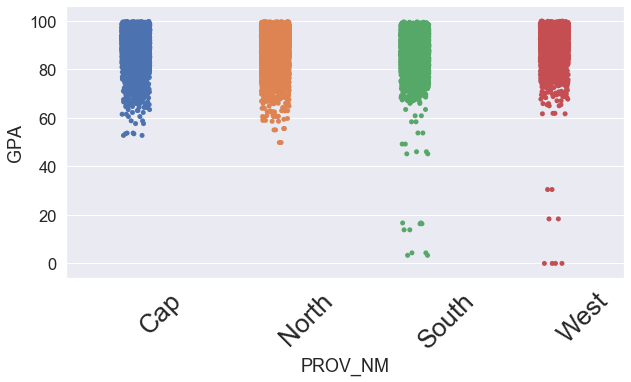

In [29]:

plt.figure(figsize=(10,5))
a= sns.stripplot(y = "GPA", x = "PROV_NM", data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

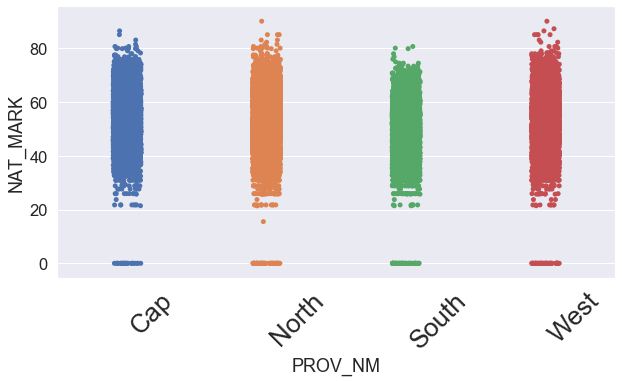

In [30]:
plt.figure(figsize=(10,5))
a= sns.stripplot(y = "NAT_MARK", x = "PROV_NM", data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)

## for i in df.PROV_NM.unique():
sns.distplot(df.D_MARK[df.PROV_NM==i],
                 kde=1,label='{}'.format(i))

plt.legend()

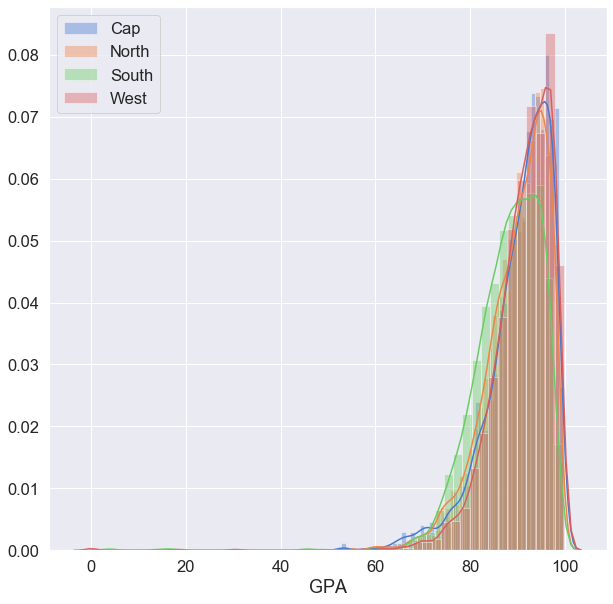

In [31]:
plt.figure(figsize=(10,10))
sns.set_palette("muted")
for i in df.PROV_NM.unique():
    sns.distplot(df.GPA[df.PROV_NM==i],         kde=1,label='{}'.format(i) )
    plt.show

plt.legend(loc="upper left")

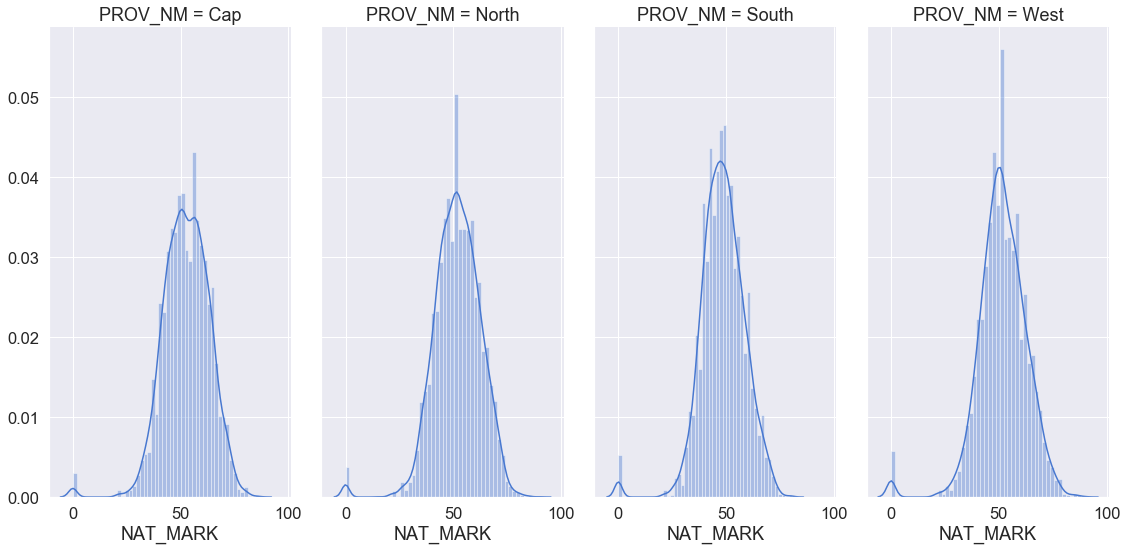

In [36]:
g=sns.FacetGrid(df, col="PROV_NM" , aspect=.5, height=8)
g.map(sns.distplot,"NAT_MARK", bins=50)

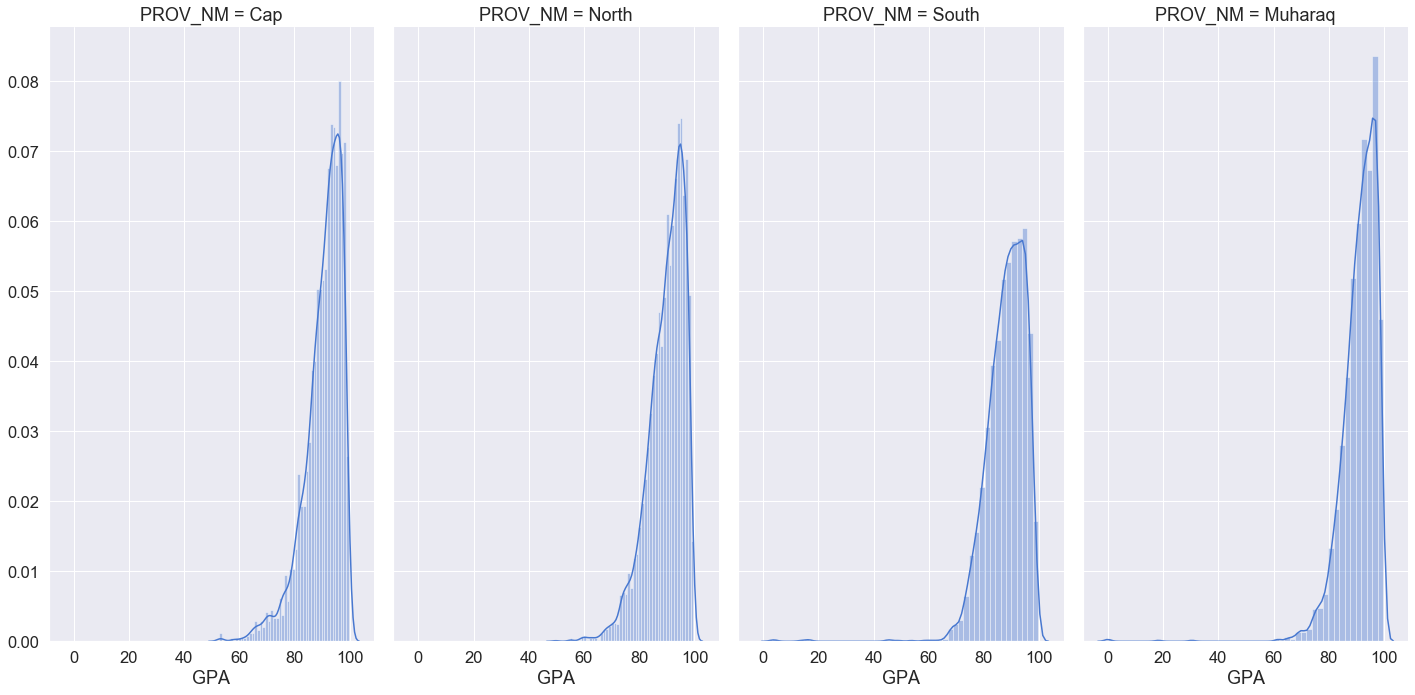

In [233]:
g=sns.FacetGrid(df, col="PROV_NM", aspect=.5, height=10)
g.map(sns.distplot,"GPA" )

 plot 4. grpahs, each for A province.   draw average and the mean adn The mode .   observe their order and look if the mean is far less or more than the average.  
 if data was for a prduct to sale, we could say that those item are over or under priced
 

#  Tests for Normal Distribution
###  1. Statistical Normality Tests: D’Agostino’s $K^2 Test$ 



In [234]:
from scipy import stats
Gpa_test,GPA_P = stats.normaltest(df.GPA)
print(f'GPA Normal test result  (P-value): {GPA_P}')

Nat_test,Nat_P = stats.normaltest(df.NAT_MARK)
print(f'National Exam Normal test result  (P-value): {Nat_P}')



GPA Normal test result  (P-value): 0.0
National Exam Normal test result  (P-value): 0.0


- p value (0 )is less than our alpha (significance value  0.05), we can **reject the hypothesis that this sample data is normally distributed**

###  1. Statistical Normality Tests : Q-Q plot

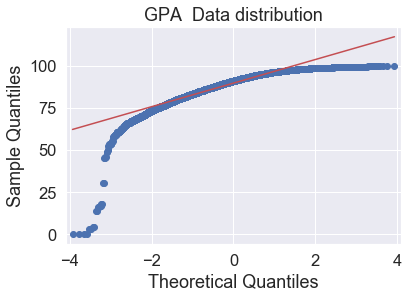

In [235]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df.GPA, line='s')
plt.title(" GPA  Data distribution ")
plt.show()

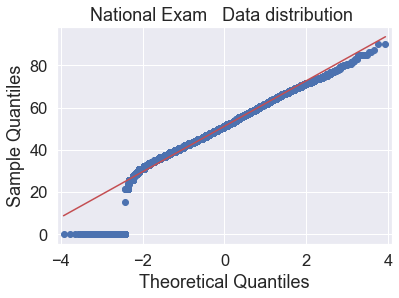

In [236]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df.NAT_MARK, line='s')
plt.title("National Exam   Data distribution ")
plt.show()

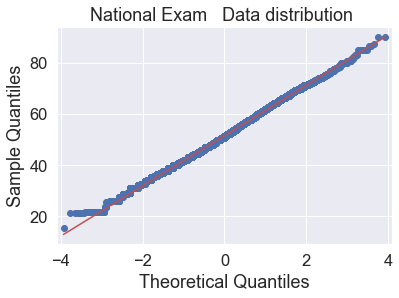

In [237]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df[df.NAT_MARK>0].NAT_MARK, line='s')
plt.title("National Exam   Data distribution ")
plt.show()

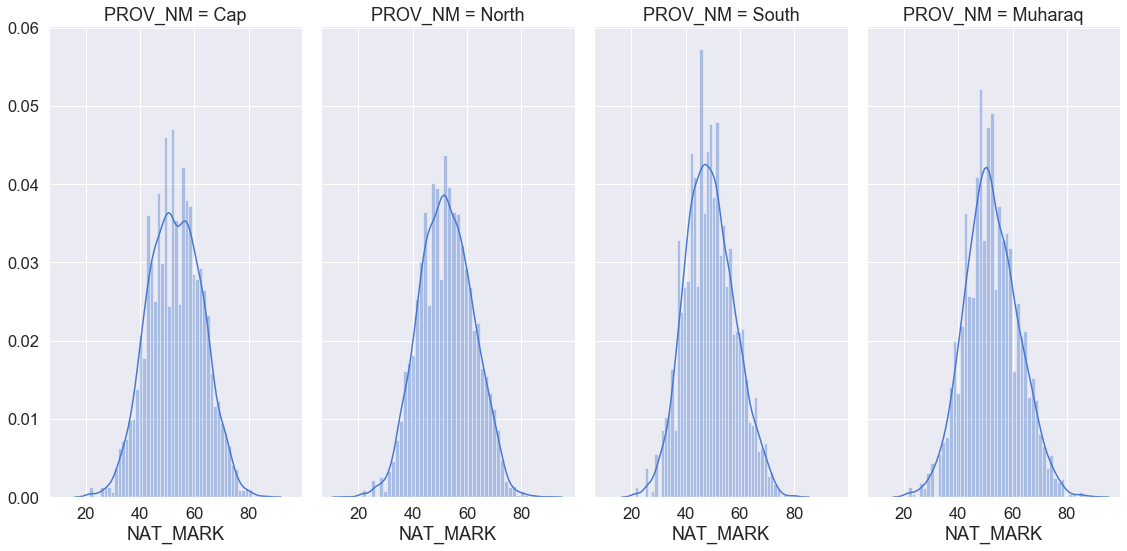

In [239]:
g=sns.FacetGrid(df[df.NAT_MARK>0], col="PROV_NM" , aspect=.5, height=8)
g.map(sns.distplot,"NAT_MARK", bins=50)

In [240]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

###  3. Statistical Normality Tests - Shapiro 

In [241]:
from scipy.stats import shapiro
stat, p = shapiro(df.sample(frac=0.2,weights="GPA",   random_state=1).GPA)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.906, p=0.000


In [242]:

stat, p = shapiro(df[df.NAT_MARK>0].sample(n=5000,weights="NAT_MARK" , random_state=1).NAT_MARK)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.999, p=0.007


- p value (0 )is less than our alpha (significance value  0.05), we can **reject the hypothesis that this sample data is normally distributed**

###  4. Statistical Normality Tests – Anderson-Darling Test 

In [243]:
from scipy.stats import anderson
result = anderson(df.GPA)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 411.388
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [244]:
from scipy.stats import anderson
result = anderson(df.NAT_MARK)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 47.214
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


# BoxPlot

 National Exam GPA  Median value : 91.09


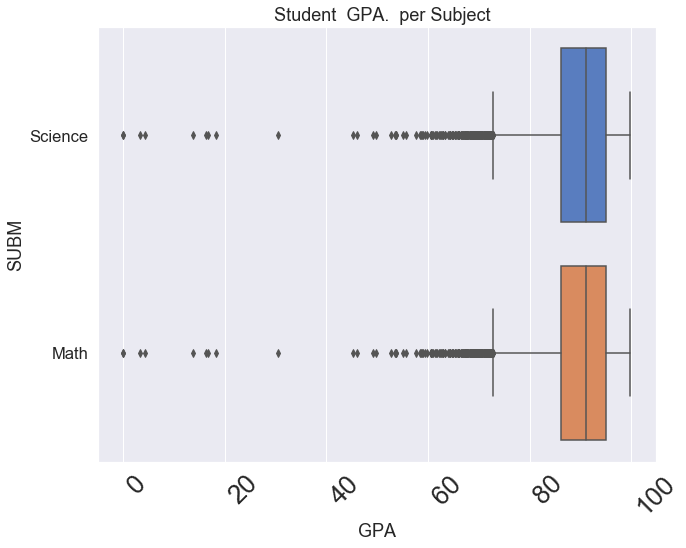

In [32]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df["GPA"], df.SUBM, data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)
plt.title( "  Student  GPA.  per Subject")
print(' National Exam GPA  Median value : {:2.2f}'.format(df.GPA.median()))

Median value : 51.30


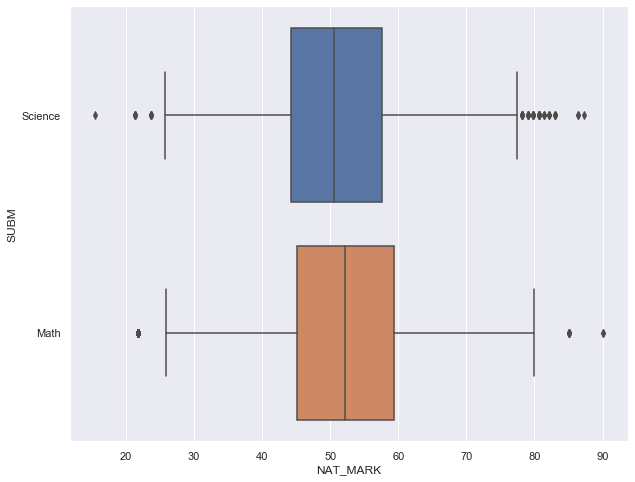

In [512]:

fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df[df.NAT_MARK>0]["NAT_MARK"], df.SUBM, data=df)
print( "Median value : %2.2f"  % (df.NAT_MARK.median()))

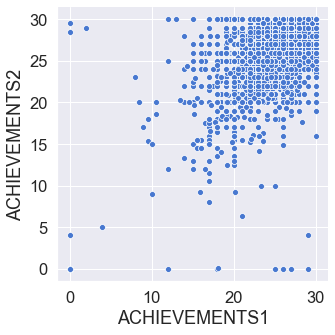

In [247]:
# tracking correlatin between both Achievements
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2",  data=df)
plt.show()

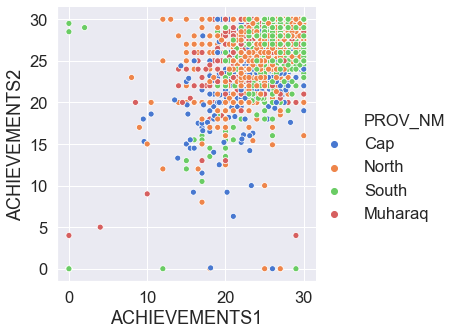

In [248]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="PROV_NM")
plt.show()

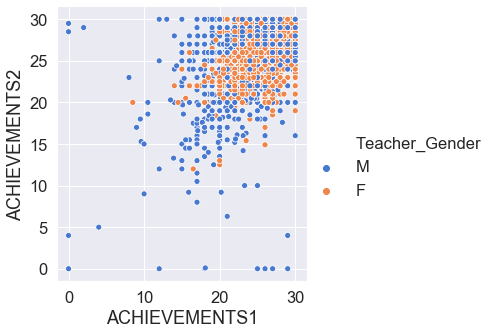

In [249]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="Teacher_Gender")
plt.show()

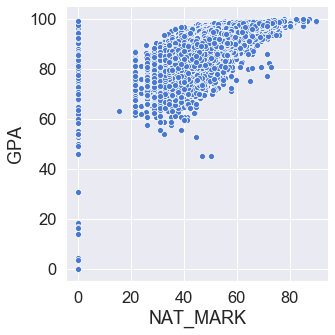

In [250]:
sns.relplot(x="NAT_MARK", y="GPA", data=df)

- Notice those Student with 0 @ NAT_MARK

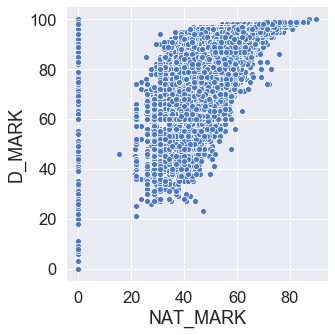

In [251]:
sns.relplot(x="NAT_MARK", y="D_MARK", data=df)

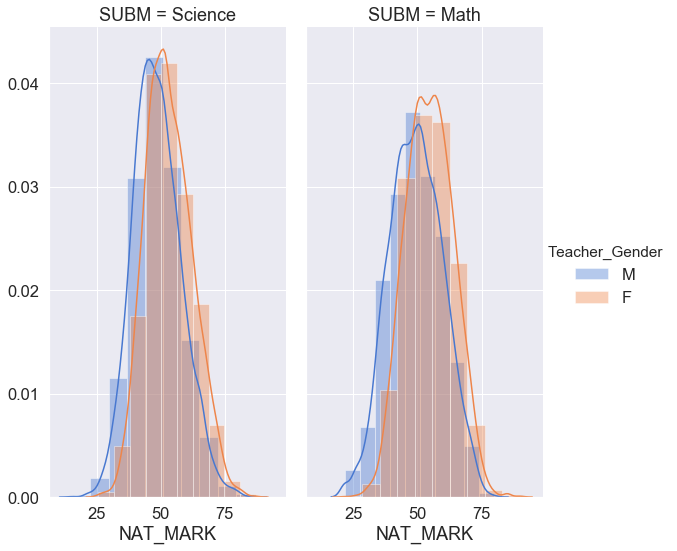

In [256]:
g=sns.FacetGrid(df[df.NAT_MARK>0], col="SUBM", hue="Teacher_Gender", height=8, aspect=.5)
g.map(sns.distplot, "NAT_MARK", bins=10)
g.add_legend()
plt.show()

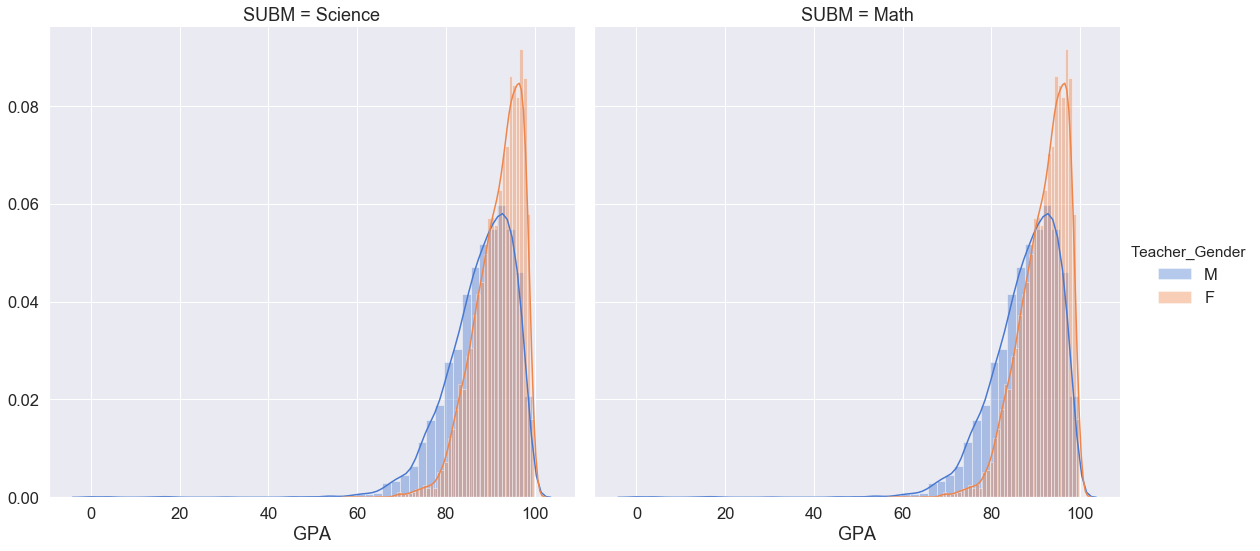

In [257]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender",  height=8, aspect=1)
g.map(sns.distplot, "GPA", bins=50)
g.add_legend()
plt.show()

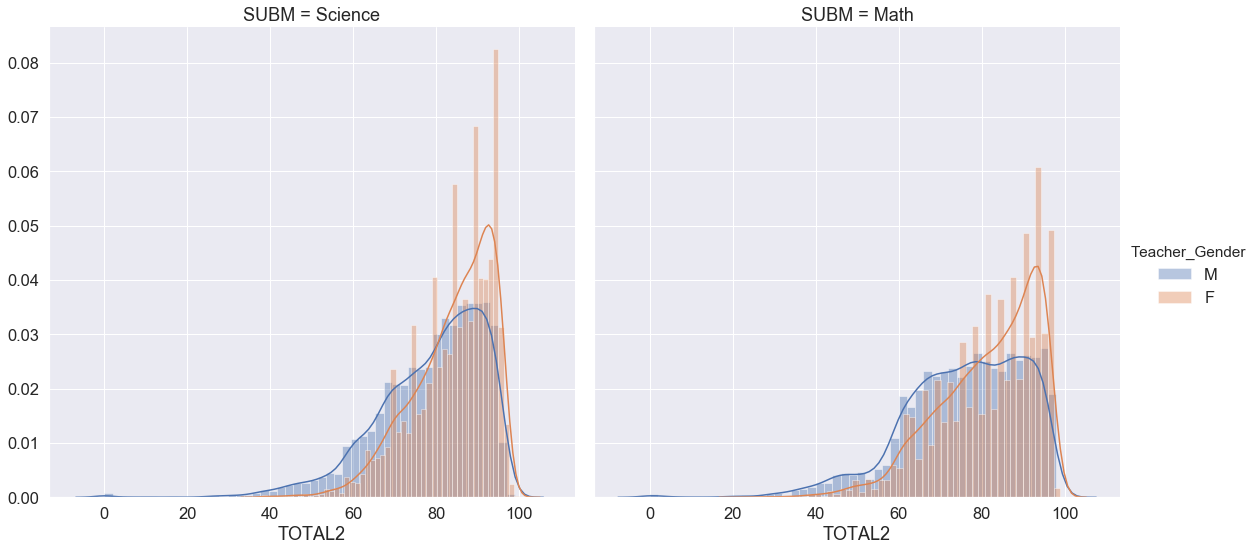

In [389]:
sns.set(font_scale=1.5)
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", aspect=1,  height=8)
g.map(sns.distplot, "TOTAL2", bins=50)
g.add_legend()
plt.show()

 this is a title


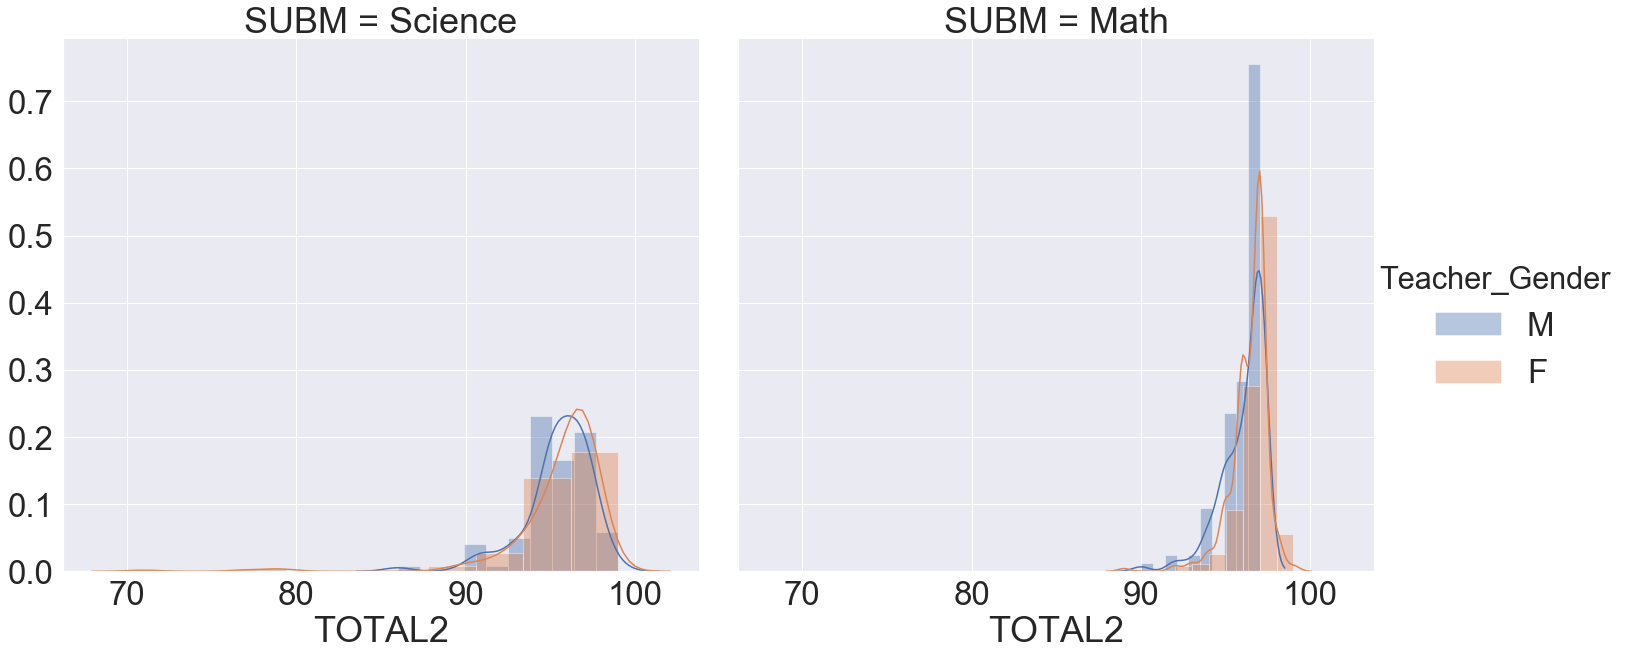

In [391]:
sns.set(font_scale=3)
#with sns.plotting_context(rc={"legend.fontsize":26}):
g=sns.FacetGrid(df[df.NAT_MARK>70], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10)
g.map(sns.distplot, "TOTAL2", bins=10) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
g.add_legend()
plt.show()


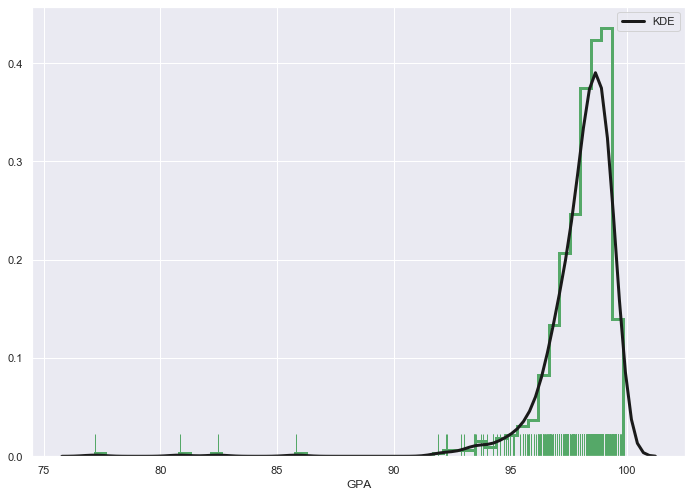

In [353]:
sns.distplot(A.GPA, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [264]:
df.Teacher_Gender.head()

0    M
1    M
2    M
3    M
4    M
Name: Teacher_Gender, dtype: object

In [265]:
df[df.Teacher_Gender=="M"].TOTAL2.value_counts()

88    389
86    370
90    369
93    367
91    365
     ... 
26      1
19      1
11      1
24      1
12      1
Name: TOTAL2, Length: 91, dtype: int64

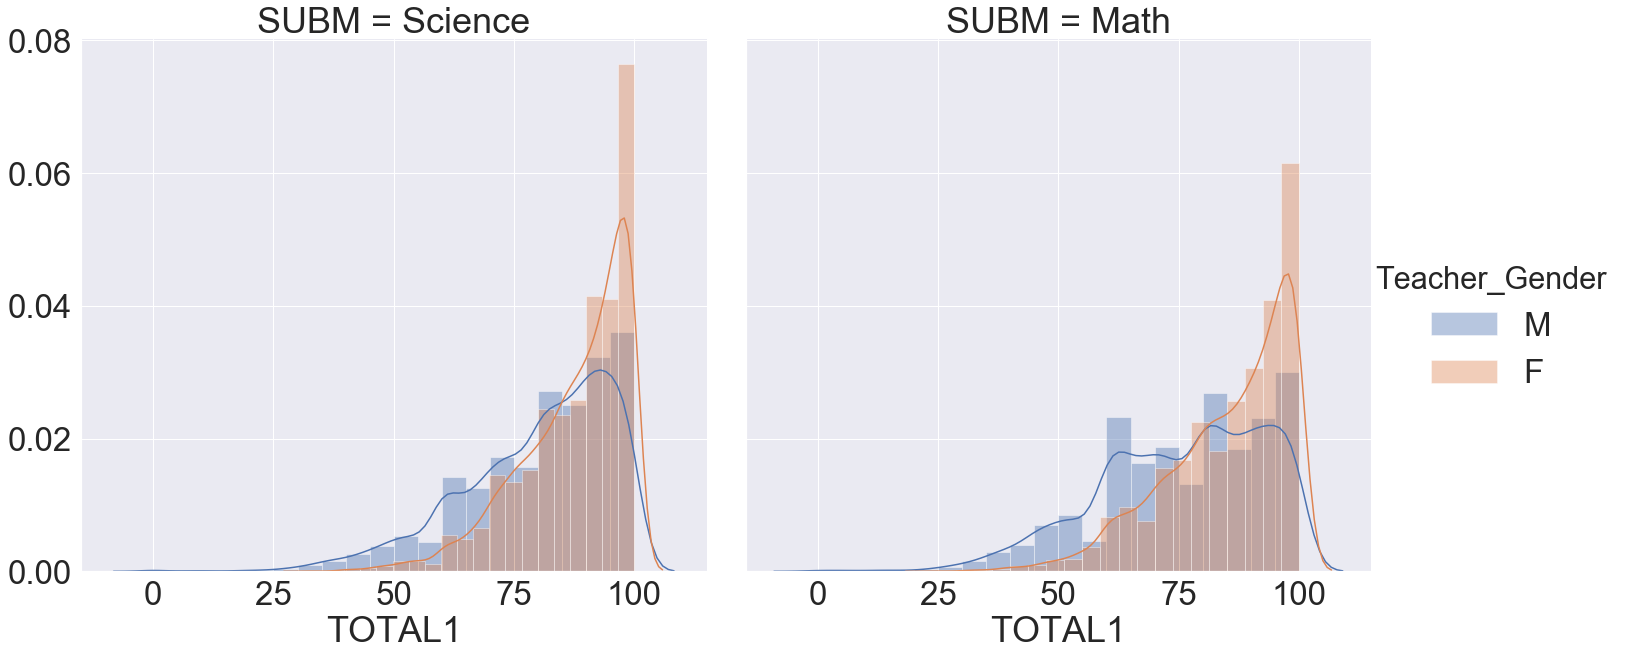

In [397]:
sns.set(font_scale=3)
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", aspect=1, height=10)
g.map(sns.distplot, "TOTAL1", bins=20)
g.add_legend()

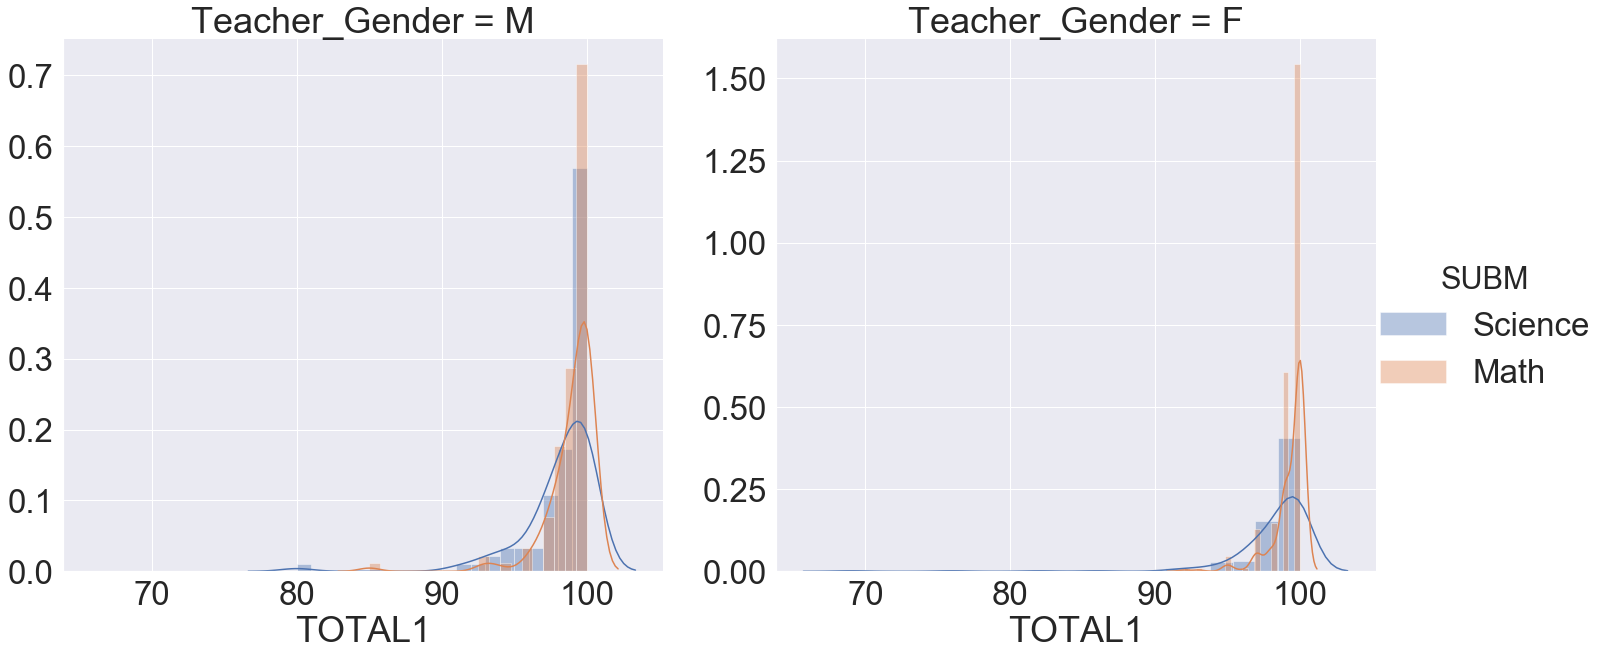

In [408]:
g=sns.FacetGrid(df[df.NAT_MARK>70], hue="SUBM", col="Teacher_Gender", aspect=1,  height=10, sharey=False)
g.map(sns.distplot, "TOTAL1", bins=20)
g.add_legend()
plt.show()

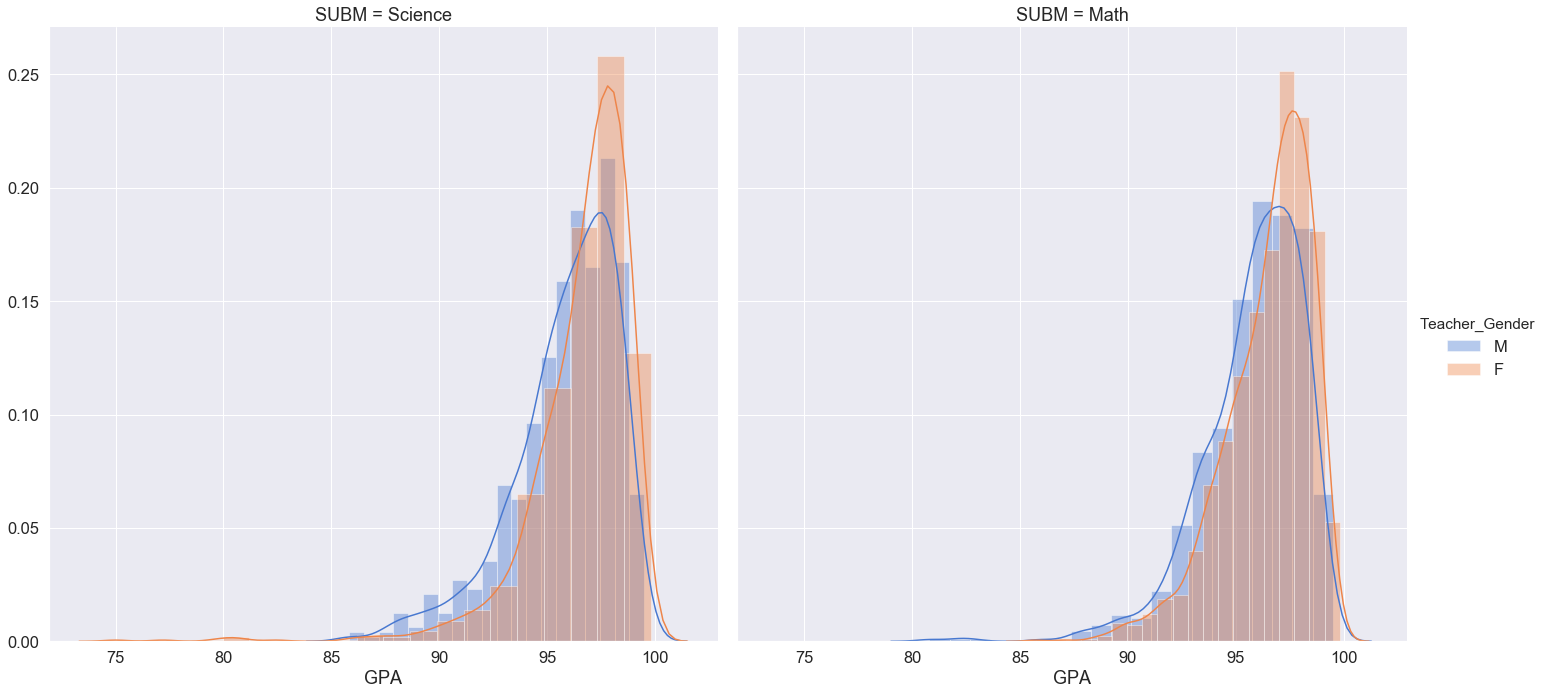

In [33]:
g=sns.FacetGrid(df[df.NAT_MARK>60], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10)
g.map(sns.distplot, "GPA", bins=20)
g.add_legend()

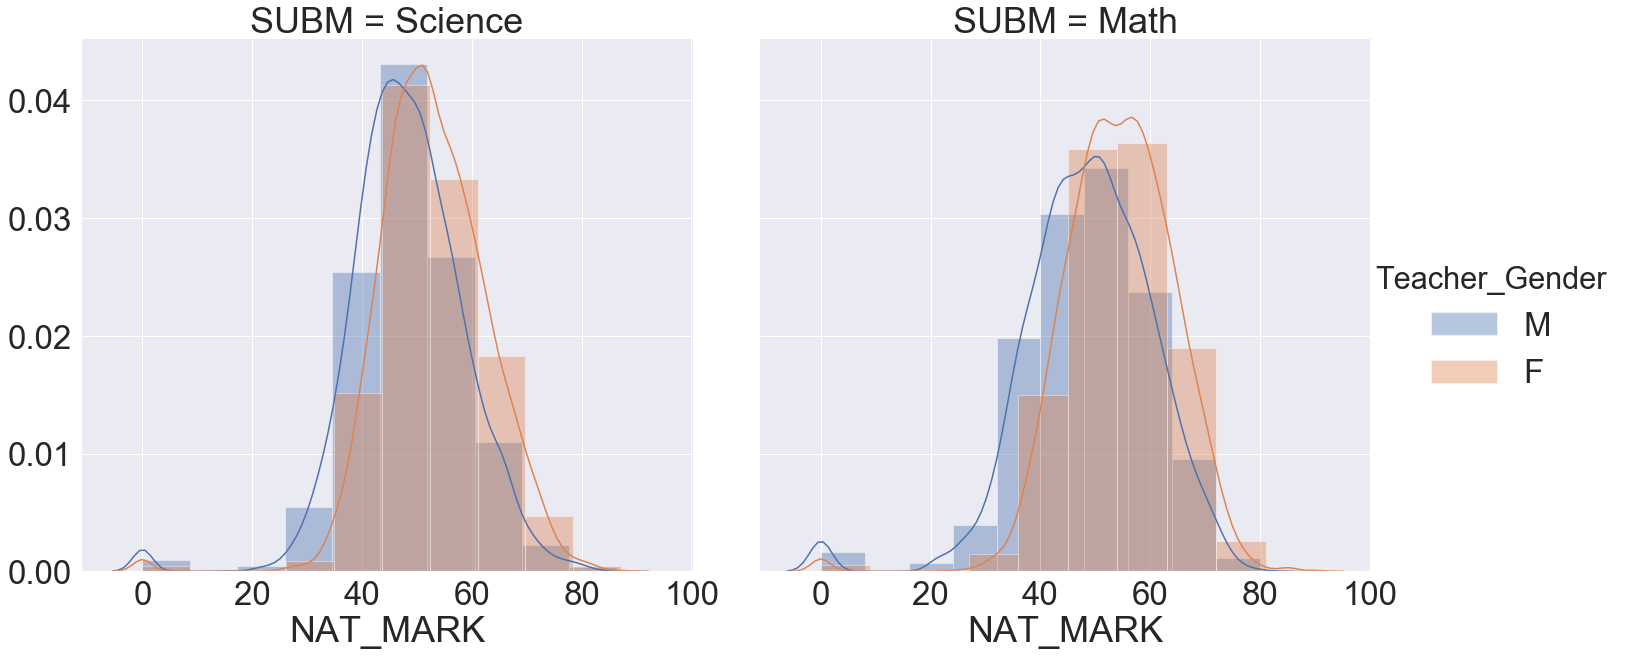

In [414]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", aspect=1,  height=10)
g.map(sns.distplot, "NAT_MARK", bins=10)
g.add_legend()

In [281]:
df.PROV_NM.value_counts().index

Index(['North', 'South', 'Muharaq', 'Cap'], dtype='object')

In [282]:
df[df.GPA>75].SUBM.count()

23406

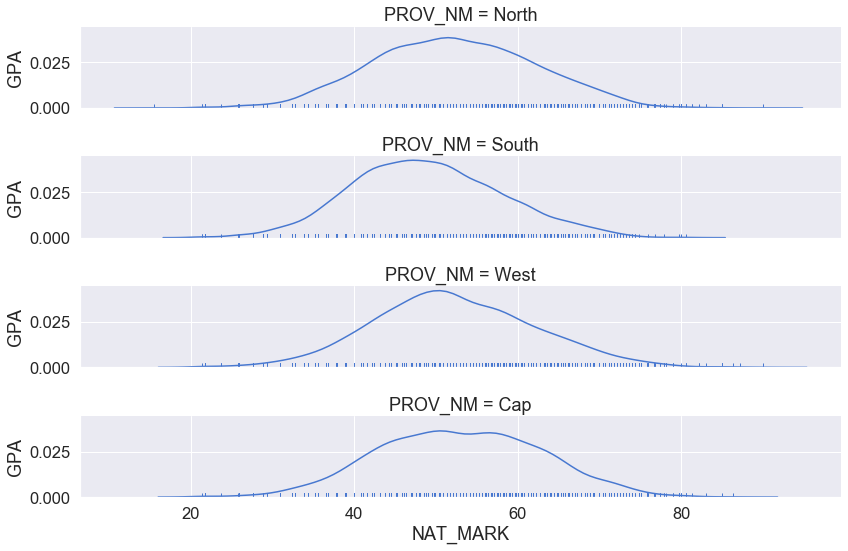

In [34]:
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df[df.NAT_MARK>0], row="PROV_NM",row_order=province,  height=2,  aspect=6)
g.map(sns.distplot, "NAT_MARK", "GPA", hist=False, rug=True)

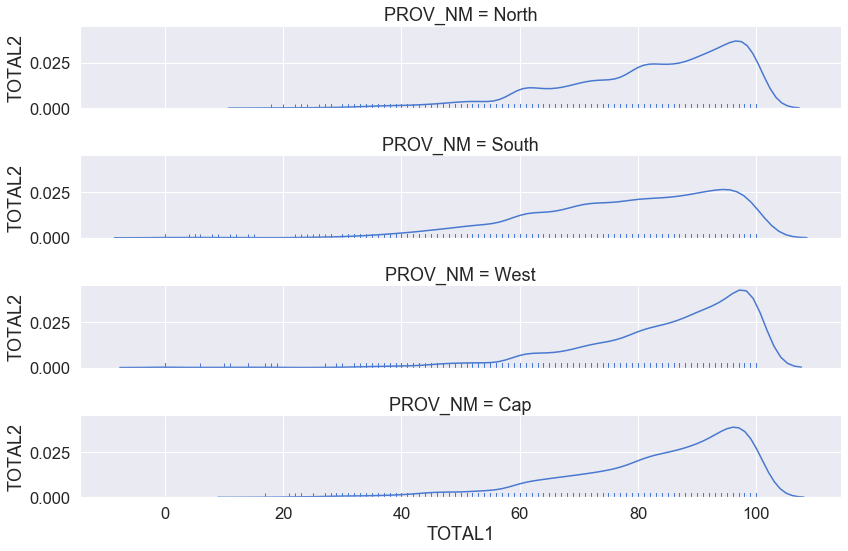

In [35]:
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df, row="PROV_NM",row_order=province,  height=2,  aspect=6)
g.map(sns.distplot, "TOTAL1", "TOTAL2", hist=False, rug=True)
plt.show()

In [297]:
# g=sns.FacetGrid(df[df.NAT_MARK>0], hue="PROV_NM",palette="Set1",  height=5,  hue_kws={"marker":["^", "v"]})
# g.map(plt.scatter, "NAT_MARK", "GPA", s=50, edgecolor="white")
# g.add_legend();

In [339]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [185]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [76]:
df["ACHIEVEMENTS1"].isnull().sum()

df.isnull().sum()

18

In [68]:
# df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
#                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
#                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
#                             pd.NaT]})
# print(df)
# df.dropna()

In [162]:

for i in df:
    sum(pd.isnull(df[i]))

In [250]:
 %%timeit
 df.isnull().any().any()

5.19 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [164]:
df.shape

(24190, 16)

In [36]:
df.dropna()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
CPR_NO,,,,,,,,,,,,,,,
70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.900000
71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.500000
70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.200000
70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.900000
70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70304602,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364
71007423,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818
70402183,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273


In [37]:
df.shape

(24190, 15)

In [38]:
df=df.dropna()

df[df.isnull().any(axis=1)]

df.isnull().sum(axis=0)

df.ACHIEVEMENTS1.isnull().sum()

0

In [39]:
df.PROV_NM.unique()

array(['Cap', 'North', 'South', 'West'], dtype=object)

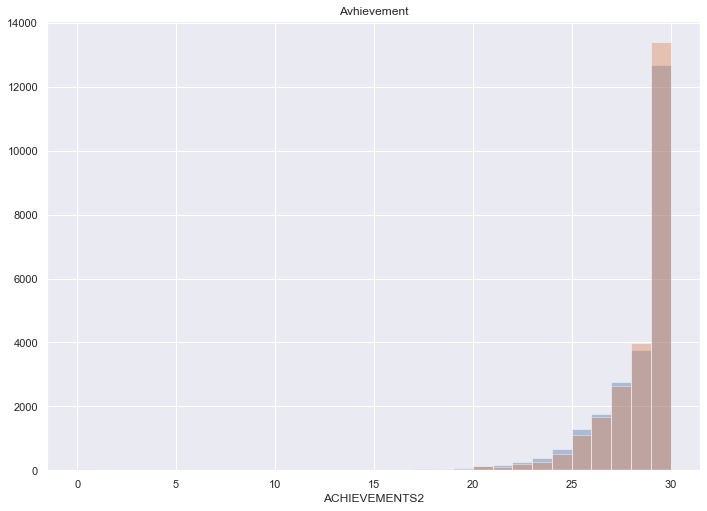

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df["ACHIEVEMENTS1"], bins=30, kde=0)
sns.distplot(df["ACHIEVEMENTS2"],  bins=30, kde=0)
plt.title("Avhievement")
plt.show()
# changing bins from 20 to 50 reveals the trend which is wierdrly perpetrated among provinces 

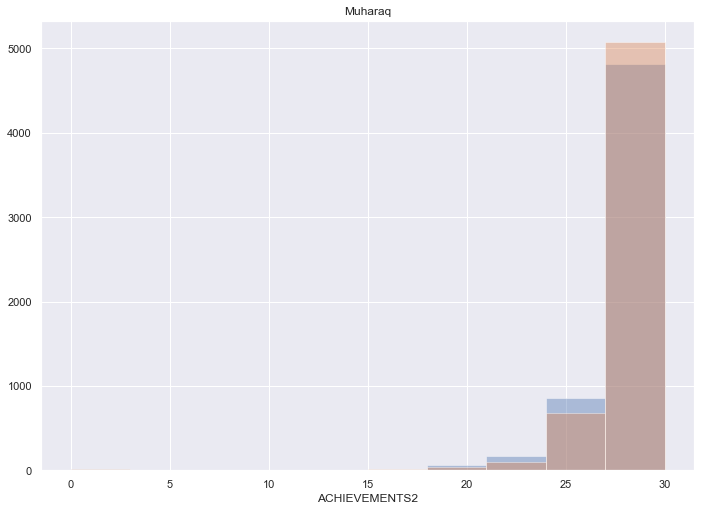

In [480]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df[df.PROV_NM=="South"]["ACHIEVEMENTS1"], bins=10, kde=0)
sns.distplot(df[df.PROV_NM=="South"]["ACHIEVEMENTS2"],  bins=10, kde=0)
plt.title("Muharaq")
plt.show()
# PLot by Province

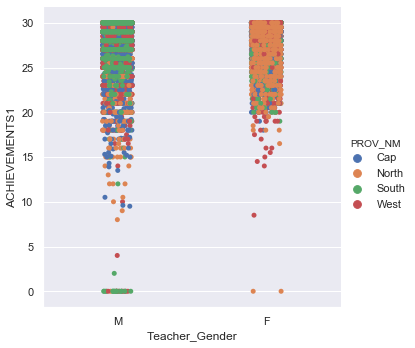

In [44]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot('Teacher_Gender', 'ACHIEVEMENTS1' , hue="PROV_NM" , data=df)
plt.show()

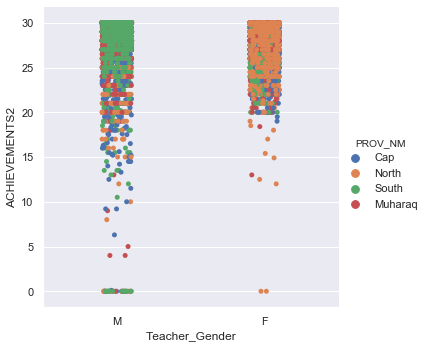

In [319]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot('Teacher_Gender', 'ACHIEVEMENTS2' , hue="PROV_NM" , data=df)
plt.show()

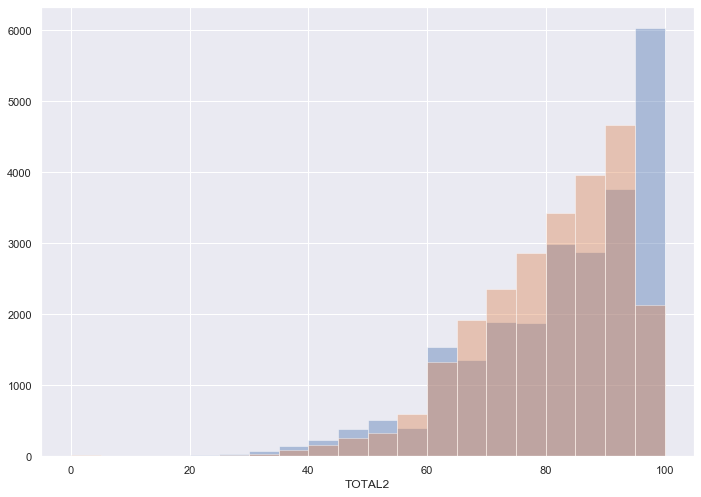

In [455]:
sns.distplot(df["TOTAL1"], kde=False, bins=20)
sns.distplot(df["TOTAL2"], kde=False, bins=20)

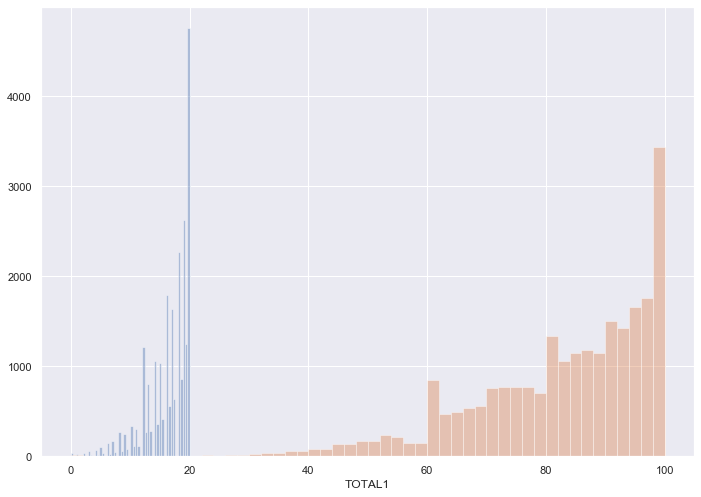

In [337]:
sns.distplot(df["MIDTERM1"], kde=False, bins=50)
sns.distplot(df["TOTAL1"], kde=False, bins=50)

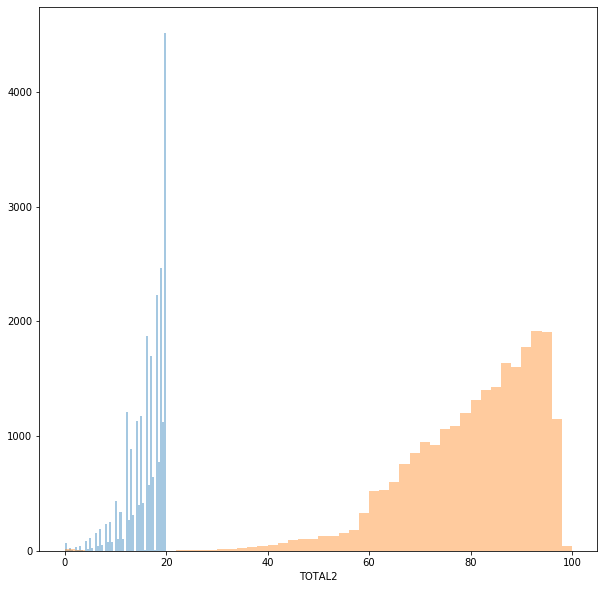

In [197]:
sns.distplot(df["MIDTERM2"], kde=False, bins=50)
sns.distplot(df["TOTAL2"], kde=False, bins=50)

In [165]:
df.SUBM.count()

24190

In [170]:
df.groupby('SUBM').size()

SUBM
الرياضيات    12095
العلوم       12095
dtype: int64

In [175]:
df.groupby(["SUBM", "STUFF_SEX"]).size()

SUBM       STUFF_SEX
الرياضيات  مدرسات       6136
           مدرسين       5959
العلوم     مدرسات       6136
           مدرسين       5959
dtype: int64

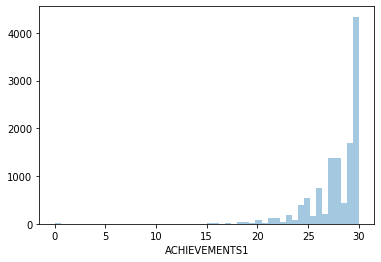

In [158]:
#fig, ax = plt.subplots(1,2)
#sns.distplot(df["ACHIEVEMENTS2"], kde=False, bins=50)
# it looks like a copy and Paste game. 
# change bins from 20 to 50 tddo even more and lok at the trend which is wierdrly copied

## let look how many student got the same Marks in both Achievement test 1 and 2 

## look at the variation of both tests for each student  and plot the graph 
  - graph by different Provinces, teachers_gender, student gender maybe 

## determine the Std for both previous tests and graph 





In [142]:
df_norm=df.copy()
df_norm.keys()

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1',
       'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [143]:
data_column_category = df_norm.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender'], dtype='object')

In [144]:
# Data Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data_column_category:

    df_norm[i] = label_encoder.fit_transform(df_norm[i])

print("Label Encoded Data: ")



Label Encoded Data: 


In [145]:
df_norm=df_norm.drop("GPA", axis=1)

In [146]:
columns_norm=df_norm.columns

In [147]:
df_norm.columns

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1',
       'TOTAL2', 'D_MARK', 'NAT_MARK'],
      dtype='object')

In [148]:

df_norm.head()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK
CPR_NO,,,,,,,,,,,,,,
70913390,0,0,1,1,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7
71105956,0,0,1,1,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7
70712190,0,0,1,1,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1
70207496,0,0,1,1,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9
70507953,0,0,1,1,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1


In [149]:
df_norm.index

Int64Index([70913390, 71105956, 70712190, 70207496, 70507953, 70201188,
            70201170, 70712174, 70400156, 70701377,
            ...
            70811288, 70302898, 70303487, 70703353, 80205810, 70304602,
            71007423, 70402183, 70803196, 70211361],
           dtype='int64', name='CPR_NO', length=24172)


$\Large \text {Standardization:}$
$$\Large  \text {Z-score  :  } z=\frac{x-\mu} \sigma$$

In [150]:
# instantiate the StandardScaler class
scaler=StandardScaler()

In [151]:
# fit the data 
scaler.fit(df_norm)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
# scale the Data 
df_norm=scaler.transform(df_norm)

In [153]:
#. Dataframe 
df_norm_scaled=pd.DataFrame(df_norm, columns=columns_norm)

In [154]:
df_norm_scaled.keys()

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1',
       'TOTAL2', 'D_MARK', 'NAT_MARK'],
      dtype='object')

In [155]:
df_norm_scaled.head()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK
0,-1.436016,-1.404913,1.0,1.014502,-0.005247,0.744137,0.163503,0.204540,0.698894,-0.286473,0.519437,-0.007405,0.271709,0.235357
1,-1.436016,-1.404913,1.0,1.014502,-0.402604,0.323515,-0.649083,-0.063395,0.369106,0.194233,0.056476,0.149190,0.121988,-0.136992
2,-1.436016,-1.404913,1.0,1.014502,-0.402604,-0.517729,-0.919945,-0.331329,-0.950045,0.194233,-0.935583,-0.085702,-0.551759,0.086418
3,-1.436016,-1.404913,1.0,1.014502,-0.799960,-1.569284,-0.378221,-1.135133,0.604669,-0.346561,0.188751,-0.868675,-0.327176,0.160888
4,-1.436016,-1.404913,1.0,1.014502,-1.197317,-0.097107,-0.649083,-0.331329,-0.573145,0.194233,-0.737172,-0.007405,-0.402037,0.086418


In [156]:
# PCA Decomposition 
from sklearn.decomposition import  PCA
# get 90% of data variations 
pca=PCA( n_components=0.9)
pca.fit(df_norm_scaled)
pca.transform(df_norm_scaled)

array([[-0.66771582, -1.46981659,  1.65269842, ..., -0.12290464,
        -0.05616068, -0.38260535],
       [ 0.09743836, -1.28939373,  1.85787929, ..., -0.04875342,
         0.2742071 ,  0.34447884],
       [ 1.50891801, -1.17018843,  1.78294327, ..., -0.16685499,
         0.25389416,  0.92006339],
       ...,
       [ 3.16351927,  0.50811366, -1.54405497, ..., -1.62562094,
         0.63151299,  0.16094529],
       [ 0.81964032,  0.31357192, -1.59261924, ..., -1.34003533,
         0.6360681 , -1.33303959],
       [ 3.47615892,  0.11537142, -1.73602159, ..., -2.06122154,
        -0.28592656, -0.52461435]])

In [157]:
pca.n_components_

7

In [ ]:
X=df_norm_scaled
y=df.GPA
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,    test_size=0.3,   )

In [ ]:
model = xgb.XGBRegressor()
params = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
  gs = GridSearchCV(
        estimator=model,
        param_grid=params, 
        cv=10, 
        n_jobs=-1, 
        scoring="neg_mean_squared_error",
        verbose=2
    )
fitted_model = gs.fit(X_train_data, y_train_data)
fitted_model.predict(X_test_data)
# Root Mean Squared Error
print(np.sqrt(- model.best_score_))
print(model.best_params_)

In [ ]:
from sklearn.linear_model import  
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), 
                        PCA(n_components=2),
                        LogisticRegression(random_state=1, solver='lbfgs'))

In [487]:
bins = [0, 60, 70, 80, 90, np.inf]
names = ['<60', '60-70', '70-80', '80-90', '>90']

df['GPA_class'] = pd.cut(df['GPA'], bins, labels=names)
df['NAT_class'] = pd.cut(df['NAT_MARK'], bins, labels=names)



/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [488]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA', 'GPA_class',
       'NAT_class'],
      dtype='object')

In [499]:
df.tail()


,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,GPA_class,NAT_class
24185,70304602,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364,>90,60-70
24186,71007423,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818,80-90,<60
24187,70402183,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273,80-90,<60
24188,70803196,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818,80-90,<60
24189,70211361,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,29.0,27.0,14.0,16.0,16.0,19.5,59.0,63,61,39.0,81.818182,80-90,<60


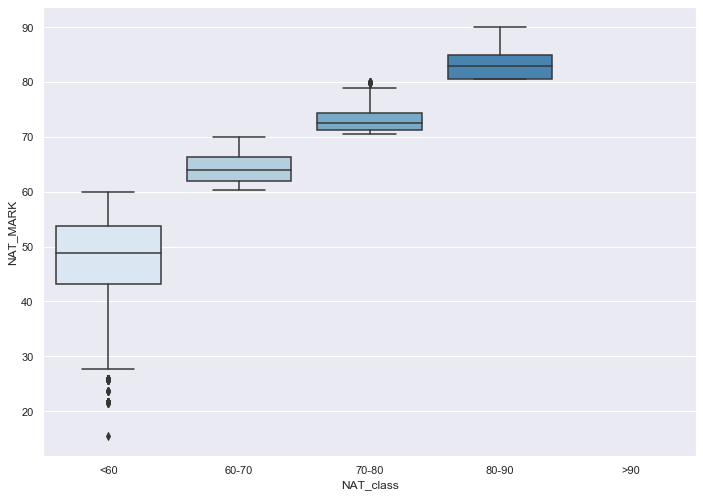

In [514]:
sns.boxplot(y=df[df.NAT_MARK>0]["NAT_MARK"], x=df[df.NAT_MARK>0].NAT_class, orient="v", palette="Blues")
plt.show()

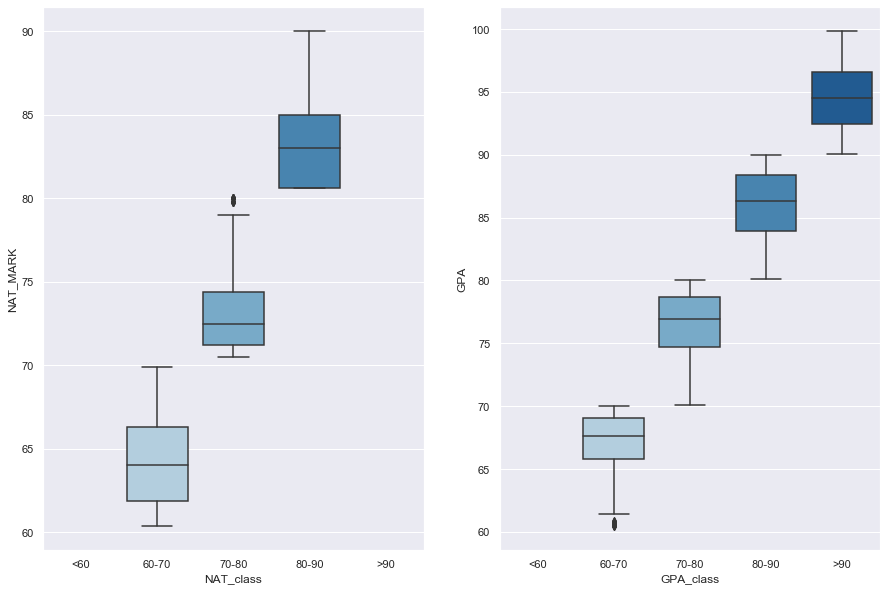

In [539]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,10))
sns.boxplot(y=df[df.NAT_MARK>60]["NAT_MARK"], x=df[df.NAT_MARK>60].NAT_class, orient="v", palette="Blues", ax=ax1)
sns.boxplot(y=df[df.GPA>60]["GPA"], x=df[df.GPA>60].GPA_class, orient="v", palette="Blues", ax=ax2)
plt.show()

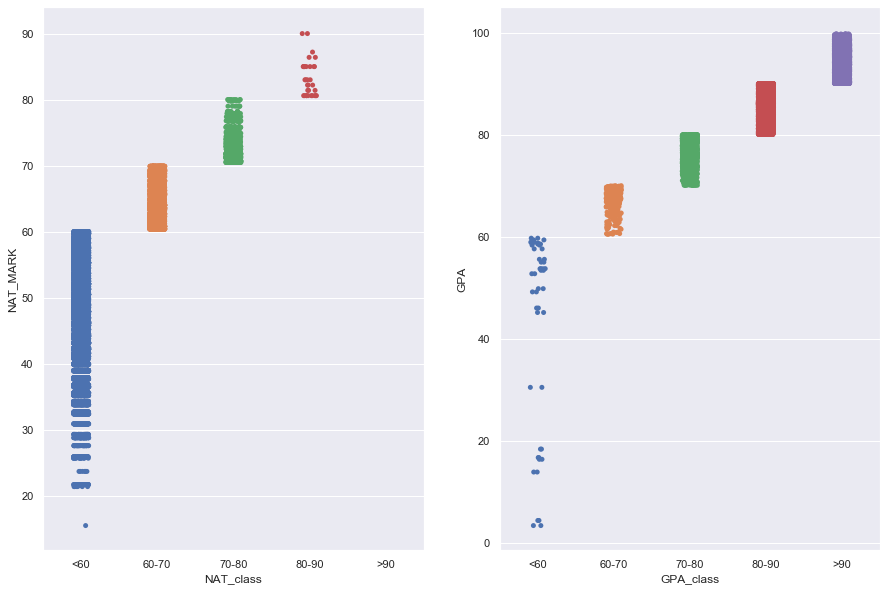

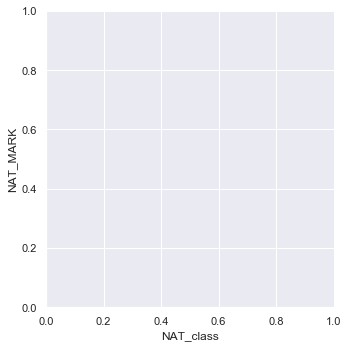

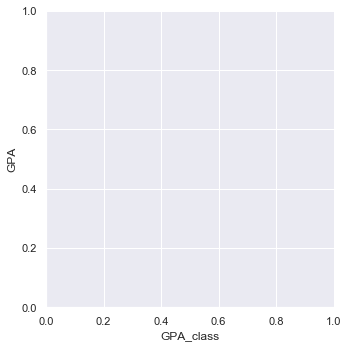

In [575]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,10))
ax=sns.catplot( x="NAT_class", y="NAT_MARK",data=df[df.NAT_MARK>0], ax=ax1)
ax=sns.catplot( x="GPA_class", y="GPA" ,data=df[df.GPA>0], ax=ax2)
plt.show()

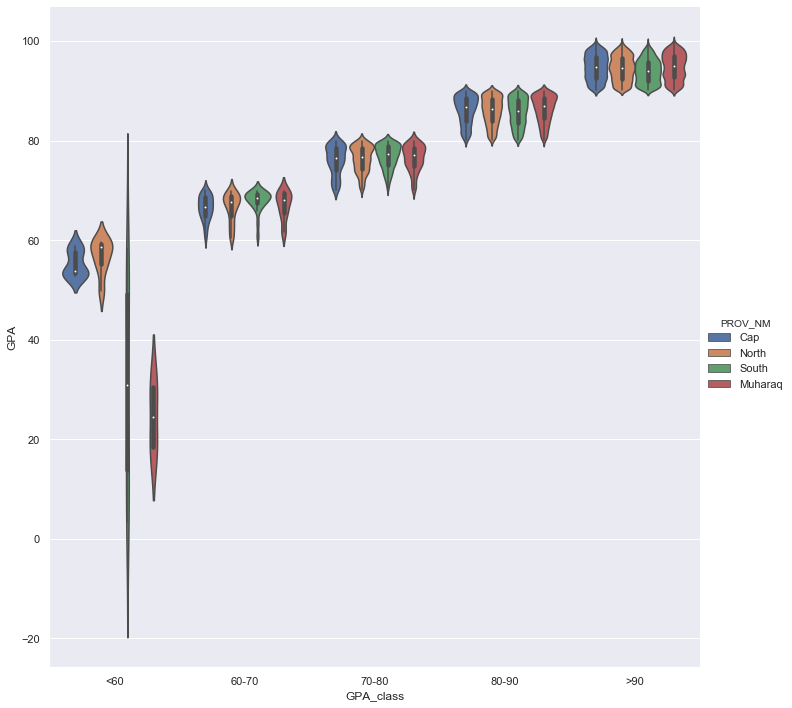

In [592]:
sns.catplot(x="GPA_class", y="GPA" ,data=df, hue="PROV_NM", kind="violin", height=10, aspcet=.7)

In [ ]:
df.PROV_NM.unique()

- Note the median positions among all violin polts above. ( median North  twice  Muharaq median)

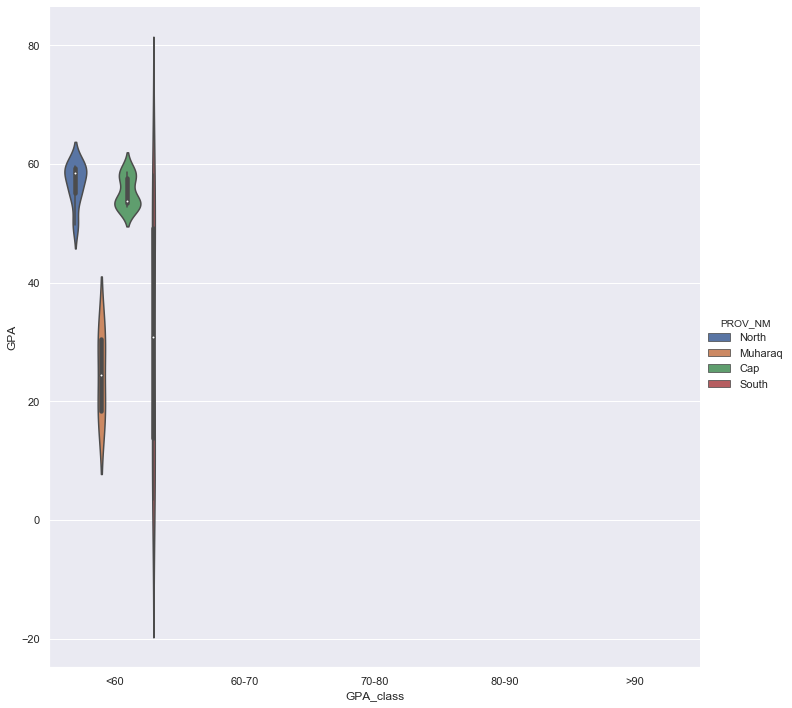

In [608]:
sns.catplot(x="GPA_class", y="GPA" ,data=df[df.GPA<60], hue="PROV_NM", kind="violin", height=10, aspcet=.7)

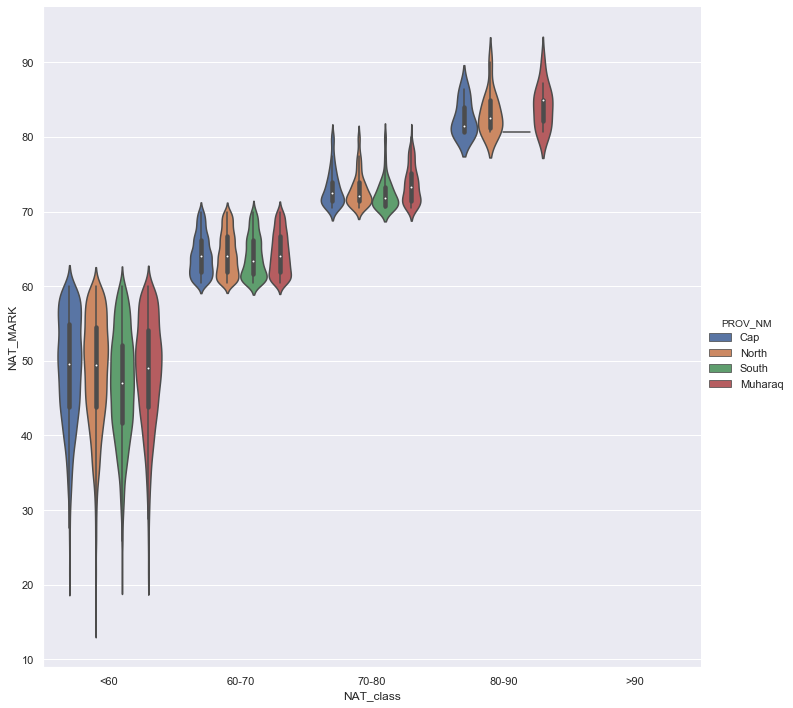

In [610]:
sns.catplot(x="NAT_class", y="NAT_MARK" ,data=df[df.NAT_MARK>0], hue="PROV_NM", kind="violin", height=10, aspcet=.7)




In [ ]:
df.grou

In [15]:
s = pd.Series([1,2,3, np.nan, 5])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

In [16]:

s.value_counts(), s.value_counts(dropna = False)

(5.0    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64, 5.0    1
 NaN    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64)

In [26]:
df['ACHIEVEMENTS1'].value_counts(dropna=False)

30.0    7491
29.0    3602
28.0    2910
27.0    2163
29.5    1542
        ... 
9.6        1
21.8       1
20.6       1
15.2       1
15.9       1
Name: ACHIEVEMENTS1, Length: 129, dtype: int64

In [30]:
df['ACHIEVEMENTS1'].value_counts(dropna=False, bins=5)

(24.0, 30.0]     22457
(18.0, 24.0]      1553
(12.0, 18.0]       117
(-0.031, 6.0]       32
(6.0, 12.0]         13
Name: ACHIEVEMENTS1, dtype: int64

In [18]:
df.FINAL1.value_counts(dropna=False).head()

50.0    1652
49.0    1077
48.0     934
40.0     885
47.0     863
Name: FINAL1, dtype: int64

In [22]:
df.isnull().sum()

CPR_NO        0
SCH_NM        0
PROV_NM       0
SUBM          0
STUFF_SEX     0
             ..
TOTAL1       16
TOTAL2        0
D_MARK        0
NAT_MARK      0
GPA           0
Length: 16, dtype: int64

In [25]:
df.ACHIEVEMENTS1.value_counts(normalize=True)

30.0    0.309904
29.0    0.149015
28.0    0.120387
27.0    0.089484
29.5    0.063793
          ...   
14.3    0.000041
9.6     0.000041
20.6    0.000041
23.2    0.000041
15.9    0.000041
Name: ACHIEVEMENTS1, Length: 128, dtype: float64

In [51]:
# dataframe containing only the object columns.
obj_df = df.select_dtypes(include=['object'])  #.copy()
obj_df.head()

,SCH_NM,PROV_NM,SUBM,STUFF_SEX
0,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين
1,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين
2,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين
3,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين
4,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين


In [90]:
#clean up  NULL value
df[df.isnull().any(axis=1)]

,CPR_NO,SCH_NM,PROV_NM,SUBM,STUFF_SEX,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
901,70711321,مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين,المحافظة الجنوبية,العلوم,مدرسين,NaN,28.0,NaN,13.0,NaN,26.0,NaN,67,67,45.2,79.222222
4168,60820420,مدرسة الرفاع الشرقي الابتدائية للبنات,المحافظة الجنوبية,العلوم,مدرسات,NaN,29.0,NaN,12.5,NaN,25.0,NaN,67,67,41.1,84.800000
4187,70613516,مدرسة الرفاع الشرقي الابتدائية للبنات,المحافظة الجنوبية,العلوم,مدرسات,NaN,26.5,NaN,6.0,NaN,25.0,NaN,58,58,37.7,74.300000
4234,60820438,مدرسة الرفاع الشرقي الابتدائية للبنات,المحافظة الجنوبية,العلوم,مدرسات,NaN,30.0,NaN,17.0,NaN,43.5,NaN,91,91,59.8,96.000000
5686,70800898,مدرسة الفارابي الإعدادية للبنين,المحافظة الشمالية,العلوم,مدرسين,NaN,0.0,NaN,0.0,82.0,58.0,82.0,58,70,36.5,82.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17781,70800898,مدرسة الفارابي الإعدادية للبنين,المحافظة الشمالية,الرياضيات,مدرسين,NaN,0.0,NaN,0.0,64.0,49.5,64.0,50,57,28.8,82.181818
18375,70116075,مدرسة المستقبل الابتدائية للبنات,المحافظة الجنوبية,الرياضيات,مدرسات,NaN,29.5,NaN,15.5,NaN,37.0,NaN,82,82,46.3,84.222222
20339,71001093,مدرسة رقية الابتدائية للبنات,محافظة المحرق,الرياضيات,مدرسات,NaN,29.0,NaN,20.0,NaN,42.0,NaN,91,91,59.3,95.555556
21378,70922870,مدرسة سمية الابتدائية للبنات,محافظة العاصمة,الرياضيات,مدرسات,NaN,25.0,NaN,14.0,NaN,28.5,NaN,68,68,41.6,81.000000


In [94]:
np.count_nonzero(obj_df.isnull())

NameError: name 'obj_df' is not defined

In [65]:
obj_df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

0        1
1        1
2        1
3        1
4        1
        ..
24185    1
24186    1
24187    1
24188    1
24189    1
Length: 24190, dtype: int64

In [11]:
#clean up  NULL value
obj_df[obj_df.isnull().any(axis=1)]

,SCH_NM,PROV_NM,SUBM,STUFF_SEX


In [12]:
obj_df["SCH_NM"].value_counts()

مدرسة الامام الطبرى الابتدائية للبنين            864
مدرسة ابن سينا الابتدائية للبنين                 826
مدرسة مالك بن انس الابتدائية للبنين              804
مدرسة البسيتين الابتدائية للبنين                 626
مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين    524
                                                ... 
مدرسة الجسرة الابتدائية للبنين                    66
مدرسة جو الابتدائية الاعدادية للبنات              66
مدرسة عين جالوت الابتدائية للبنات                 52
مدرسة سكينة بنت الحسين الابتدائية للبنات          36
مدرسة عائشة ام المؤمنين الاعدادية للبنات          34
Name: SCH_NM, Length: 99, dtype: int64

In [13]:
# obj_df = obj_df.fillna({"num_doors": "four"})
# En cas où on veut replacer une valeur par une autre

In [14]:
df_copy=df

In [15]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [16]:
df_copy['SCH__NM'] = lb_make.fit_transform(df_copy['SCH_NM'])

In [141]:
df_copy.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,STUFF_SEX,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,SCH__NM
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,0
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,0
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,0
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,0
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,0


In [17]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [18]:
#df_Encoded = df[df.columns.difference(['B', 'D'])]

In [19]:

# Encoding the variable
obj_df =obj_df.apply(lambda x: d[x.name].fit_transform(x))

In [20]:
obj_df.tail()

,SCH_NM,PROV_NM,SUBM,STUFF_SEX
24185,98,0,0,1
24186,98,0,0,1
24187,98,0,0,1
24188,98,0,0,1
24189,98,0,0,1


In [21]:
df.drop(['SCH_NM','PROV_NM','SUBM', 'STUFF_SEX'], axis=1)

,CPR_NO,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,SCH__NM
0,70913390,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.900000,0
1,71105956,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.500000,0
2,70712190,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.200000,0
3,70207496,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.900000,0
4,70507953,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,70304602,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364,98
24186,71007423,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818,98
24187,70402183,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273,98
24188,70803196,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818,98


In [22]:
pd.concat([df, obj_df])

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ACHIEVEMENTS1,ACHIEVEMENTS2,CPR_NO,D_MARK,FINAL1,FINAL2,GPA,MIDTERM1,MIDTERM2,NAT_MARK,PROV_NM,SCH_NM,SCH__NM,STUFF_SEX,SUBM,TOTAL1,TOTAL2
0,28.0,30.0,70913390.0,85.0,45.0,33.0,92.9,17.0,17.0,53.7,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,90.0,80.0
1,27.0,29.0,71105956.0,83.0,41.5,37.0,89.5,14.0,16.0,49.7,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,83.0,82.0
2,27.0,27.0,70712190.0,74.0,27.5,37.0,86.2,13.0,15.0,52.1,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,68.0,79.0
3,26.0,24.5,70207496.0,77.0,44.0,32.5,89.9,15.0,12.0,52.9,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,85.0,69.0
4,25.0,28.0,70507953.0,76.0,31.5,37.0,86.2,14.0,15.0,52.1,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,71.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN
24186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN
24187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN
24188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN


In [23]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,STUFF_SEX,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,SCH__NM
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,0
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,0
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,0
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,0
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,0


In [65]:
feature_names=(df.iloc[:,7:18]).columns

In [66]:
feature_names

Index(['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

- eta: It is also known as the learning rate or the shrinkage factor. It actually shrinks the feature weights to make the boosting process more conservative. The range is 0 to 1. Low eta value means the model is more robust to overfitting.

- gamma: The range is 0 to ∞. Larger the gamma more conservative the algorithm is.
- max_depth: We can specify maximum depth of a tree using this parameter.
- subsample: It is the proportion of rows that the model will randomly select to grow trees.
- colsample_bytree: It is the ratio of variables randomly chosen to build each tree in the model.

# Skewness

*skewness = 0 : normally distributed.

*skewness > 0 : more weight in the left tail of the distribution.

*skewness < 0 : more weight in the right tail of the distribution

In [190]:
df.iloc[6:16].skew()

CPR_NO          -0.171293
ACHIEVEMENTS1    0.218046
ACHIEVEMENTS2   -1.385865
MIDTERM1        -0.358600
MIDTERM2        -0.935082
                   ...   
TOTAL1           0.077588
TOTAL2          -1.227232
D_MARK          -0.558691
NAT_MARK        -0.171779
GPA             -1.128624
Length: 12, dtype: float64

Let us take a very common example of house prices. Suppose we have house values ranging from $100k to $1,000,000 with the average being $\$500,000$ .
If the peak of the distribution was left of the average value, portraying a positive skewness in the distribution. It would mean that many houses were being sold for less than the average value, i.e. $500k. This could be for many reasons, but we are not going to interpret those reasons here.
If the peak of the distributed data was right of the average value, that would mean a negative skew. This would mean that the houses were being sold for more than the average value.



In [258]:
(df.columns)

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [256]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24172 entries, 0 to 24189
Data columns (total 16 columns):
CPR_NO            24172 non-null int64
SCH_NM            24172 non-null object
PROV_NM           24172 non-null object
SUBM              24172 non-null object
Teacher_Gender    24172 non-null object
ACHIEVEMENTS1     24172 non-null float64
ACHIEVEMENTS2     24172 non-null float64
MIDTERM1          24172 non-null float64
MIDTERM2          24172 non-null float64
FINAL1            24172 non-null float64
FINAL2            24172 non-null float64
TOTAL1            24172 non-null float64
TOTAL2            24172 non-null int64
D_MARK            24172 non-null int64
NAT_MARK          24172 non-null float64
GPA               24172 non-null float64
dtypes: float64(9), int64(3), object(4)
memory usage: 3.8+ MB


# XGBoost  4. GPA

In [356]:
df.columns

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [419]:
# split data into X and y
X = df.iloc[:,5:15]
y = df.iloc[:,15]

In [420]:
X.head()

,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK
0,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7
1,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7
2,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1
3,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9
4,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1


In [421]:
y.head()

0    92.9
1    89.5
2    86.2
3    89.9
4    86.2
Name: GPA, dtype: float64

In [422]:
# Split dataset
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.3)

# XGBoost's hyperparameters

In [423]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [424]:
xg_reg.fit(Xtrain,ytrain)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [425]:
preds = xg_reg.predict(Xtest)

In [426]:
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 31.376791


# k-fold Cross Validation using XGBoost

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [428]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [429]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,80.617879,0.044406,80.617750,0.096869
1,72.576235,0.040283,72.577843,0.095339
2,65.339900,0.035925,65.341209,0.093741
3,58.826838,0.032364,58.828260,0.092489
4,52.965514,0.028457,52.967107,0.090566


In [430]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.907892
Name: test-rmse-mean, dtype: float64


In [431]:
preds = xg_reg.predict(Xtest)

In [432]:
print(preds)

[57.6176   61.697945 59.34715  ... 54.685207 63.027077 61.364117]


In [433]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [434]:
#!pip install graphviz


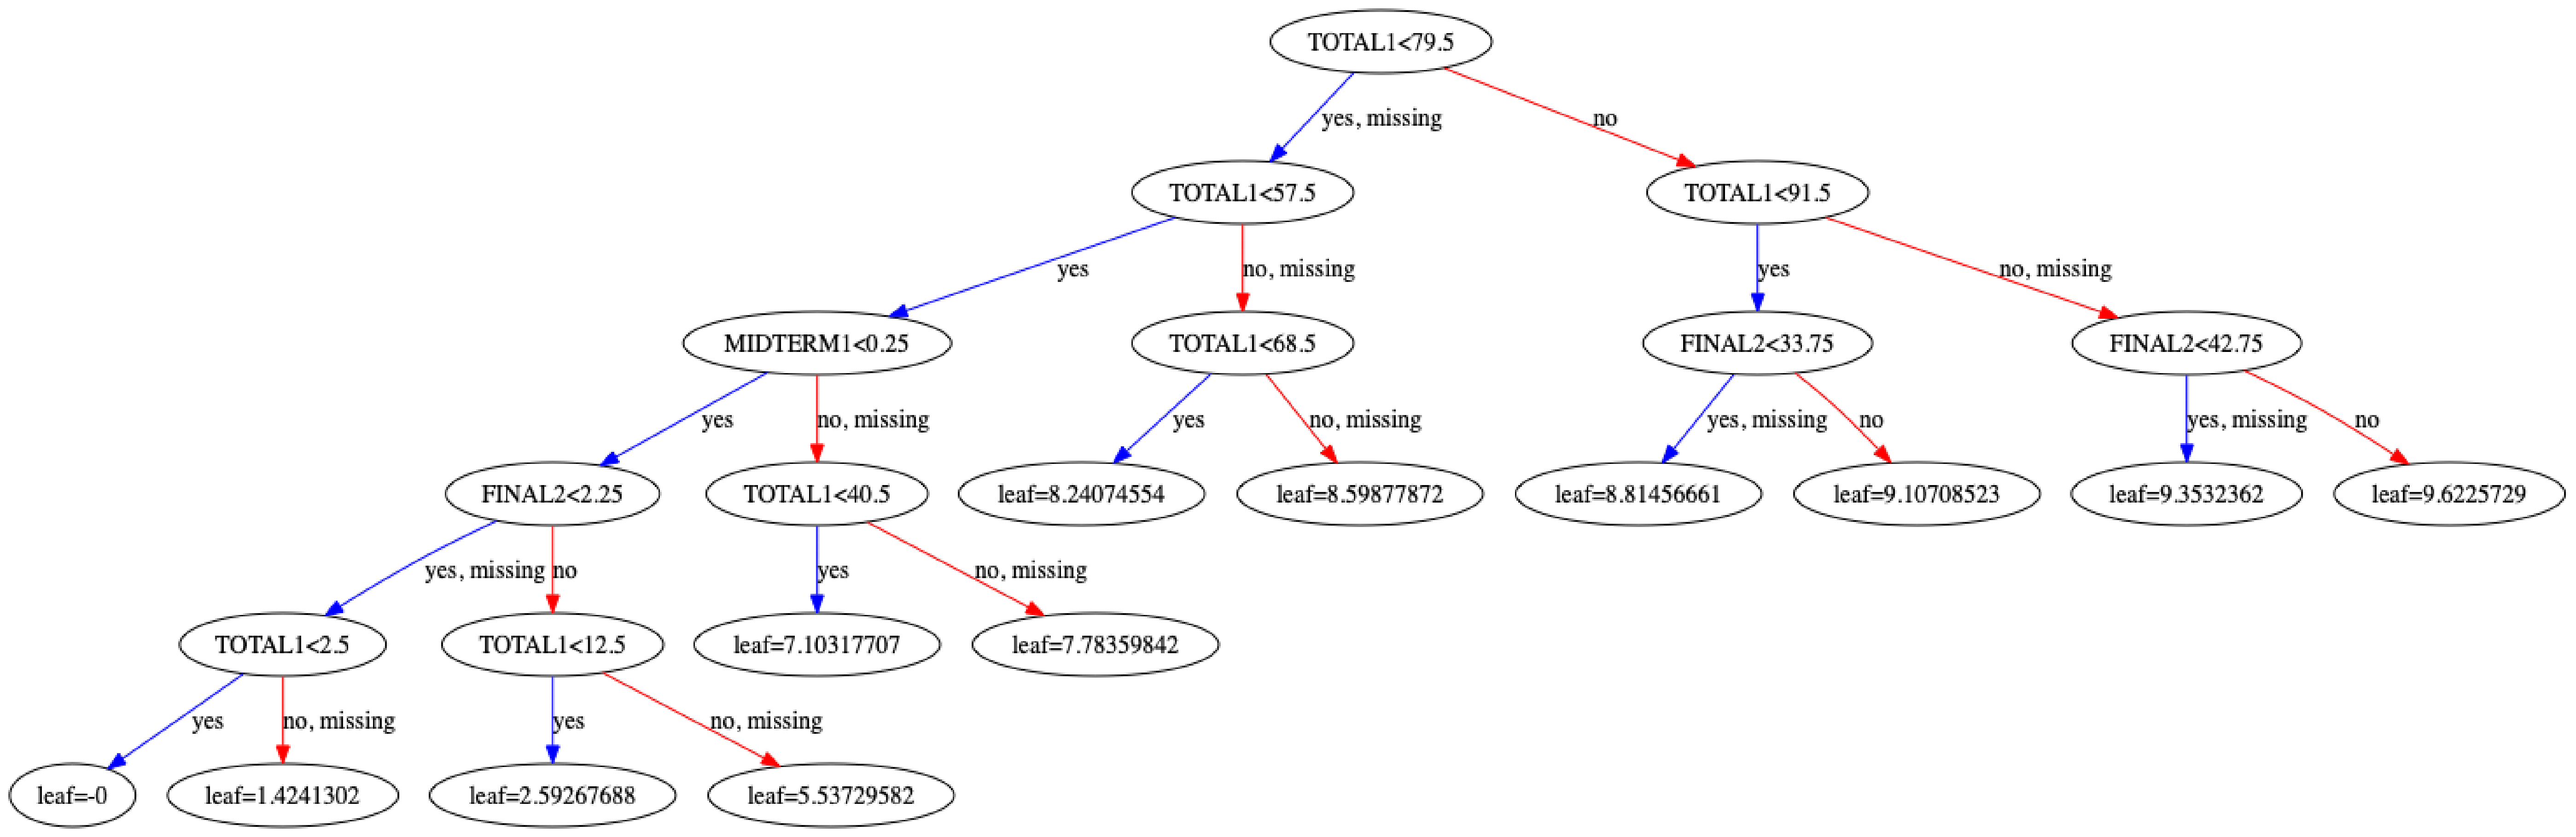

In [435]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [100, 60]


xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

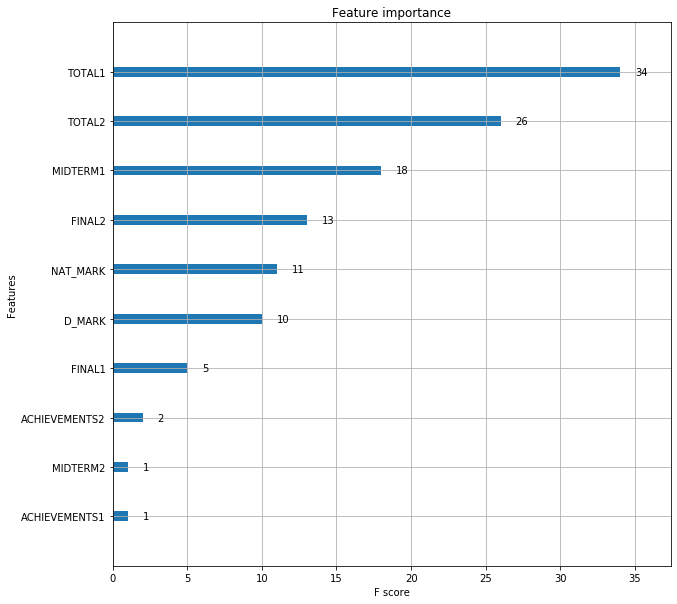

In [436]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xg_reg)
plt.show()

# XGBoost 4 NAT_MARK

In [377]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [386]:
# split data into X and y
X_N = df.loc[:,['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'GPA']]
y_N = df.loc[:,"NAT_MARK"]

In [387]:
X_N.head()

,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,GPA
0,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,92.9
1,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,89.5
2,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,86.2
3,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,89.9
4,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,86.2


In [388]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_N, y_N, test_size=0.3)

In [450]:
xreg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [451]:
xreg.fit(X_train,y_train)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [453]:
preds_N = xreg.predict(X_test)

In [454]:
rmse = np.sqrt(mean_squared_error(y_test, preds_N))
print("RMSE: %f" % (rmse))

RMSE: 19.150134


In [455]:
d_Mtrix = xgb.DMatrix(data=X_N,label=y_N)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [456]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

c_res = xgb.cv(dtrain=d_Mtrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [457]:
c_res.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,46.708833,0.050753,46.711166,0.112778
1,42.138597,0.040585,42.143132,0.112620
2,38.033896,0.038084,38.043083,0.106739
3,34.350276,0.035029,34.358001,0.100433
4,31.043496,0.030213,31.055493,0.098627


In [458]:
print((c_res["test-rmse-mean"]).tail(1))

49    6.232798
Name: test-rmse-mean, dtype: float64


In [459]:
preds_N = xreg.predict(X_test)

In [460]:
print(preds_N)

[31.230648 33.11779  33.11779  ... 32.00939  26.212772 31.432396]


In [461]:
xreg = xgb.train(params=params, dtrain=d_Mtrix, num_boost_round=10)

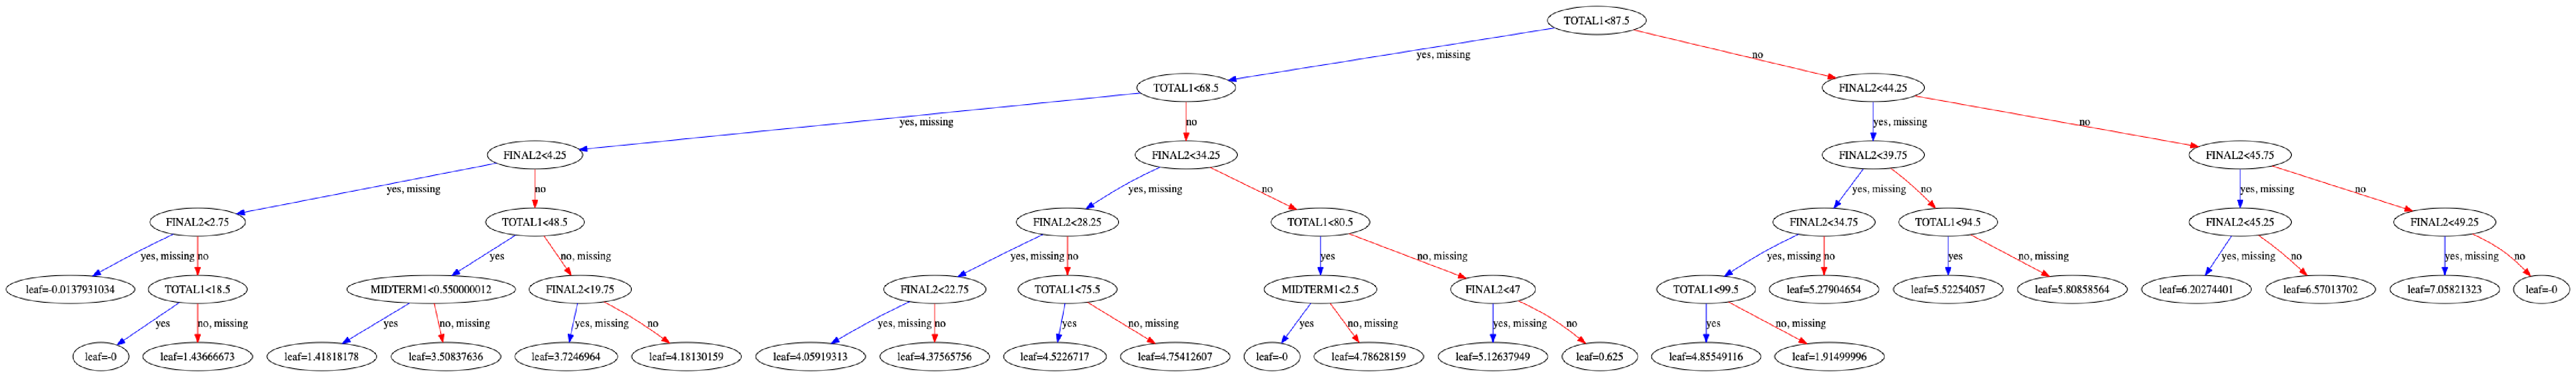

In [463]:
plt.rcParams['figure.figsize'] = [100, 100]


xgb.plot_tree(xreg,num_trees=0)
plt.show()

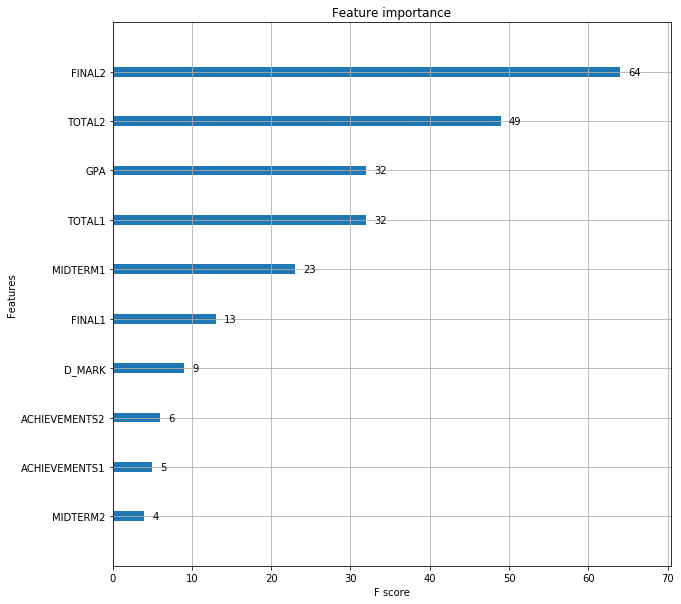

In [464]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xreg)
plt.show()

#    SandBox

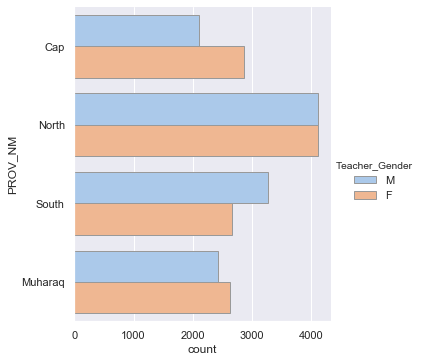

In [320]:
sns.catplot(y="PROV_NM", hue="Teacher_Gender" , kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

# Kurtosis
The exact interpretation of the measure of Kurtosis used to be disputed, but is now settled. Its about existence of outliers. Kurtosis is a measure of whether the data are heavy-tailed (profusion of outliers) or light-tailed (lack of outliers) relative to a normal distribution.

**The main difference between skewness and kurtosis is that the skewness refers to the degree of symmetry, whereas the kurtosis refers to the degree of presence of outliers in the distribution.**

- Mesokurtic
- Leptokurtic
- Platykurtic


In [482]:
arrays = [np.random.randn(3, 4) for _ in range(10)]
np.stack(arrays, axis=0).shape

(10, 3, 4)

In [ ]:
Anova Test(F-Test)
One Way F-test(Anova)
